In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import timeit
import datetime as dt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
matches = pd.read_csv("D:\sem5\datasets\matches.csv")
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
Season             756 non-null object
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(4), object(14)
memory usage: 106.4+ KB


In [4]:
deliveries = pd.read_csv("D:\sem5\datasets\deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

date is coded as a string. Lets change it to date. We are going to perform analysis by year/season. Lets create a season variable

In [6]:
matches['date'] = pd.to_datetime(matches['date'])
matches['season'] = matches['date'].dt.year
matches.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season
0,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,2,IPL-2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017


In [7]:
df_teams = matches[['team1','team2']]
df_teams.head(5)

,team1,team2
0,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils


In [8]:
df_umpires = matches[['umpire1','umpire2','umpire3']]
df_umpires.head()

,umpire1,umpire2,umpire3
0,AY Dandekar,NJ Llong,NaN
1,A Nand Kishore,S Ravi,NaN
2,Nitin Menon,CK Nandan,NaN
3,AK Chaudhary,C Shamshuddin,NaN
4,NaN,NaN,NaN


In [9]:
# The Rising Pune Supergiants and Rising Pune Supergiant team have been coded as RPS because the team_name was changed
team_names = {'Rajasthan Royals':'RR',\
              'Mumbai Indians' : 'MI',\
              'Delhi Daredevils':'DD',\
              'Kolkata Knight Riders':'KKR',\
              'Kings XI Punjab':'KXP',\
              'Sunrisers Hyderabad':'SRH',\
              'Deccan Chargers':'DC-Chargers',\
              'Chennai Super Kings':'CSK',\
              'Rising Pune Supergiants':'RPS',\
              'Royal Challengers Bangalore':'RCB',\
              'Pune Warriors':'PW',\
              'Gujarat Lions':'GL',\
              'Delhi Capitals':'DC-Capitals',\
              'Rising Pune Supergiant':'RPS',\
              'Kochi Tuskers Kerala':'KTK'
             }

In [10]:

matches['toss_winner'] = matches['toss_winner'].map(team_names)
matches['winner'] = matches['winner'].map(team_names)
matches['team1'] = matches['team1'].map(team_names)
matches['team2'] = matches['team2'].map(team_names)

In [11]:
matches[pd.isnull(matches['winner'])]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season
300,301,IPL-2011,Delhi,2011-05-21,DD,PW,DD,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN,2011
545,546,IPL-2015,Bangalore,2015-04-29,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN,2015
570,571,IPL-2015,Bangalore,2015-05-17,DD,RCB,RCB,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN,2015
744,11340,IPL-2019,Bengaluru,2019-04-30,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary,2019


In [12]:
matches['winner'].fillna('Draw',inplace = True)
matches.loc[545,'winner']

'Draw'


Does the city and venue columns make any difference? The venue and city can be combined and simplified to create a single field venue

In [13]:
venue_names = {'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':'YSR Visakhapatnam','M.Chinnaswamy Stadium':'Chinnaswamy, Bengaluru','M Chinnaswamy Stadium':'Chinnaswamy, Bengaluru',
               'Subrata Roy Sahara Stadium':'Sahara, Pune','Kingsmead':'Kingsmead, Durban','Wankhede Stadium':'Wankhede, Mumbai','Dr DY Patil Sports Academy':'DY Patil, Mumbai',
               'Brabourne Stadium':'Brabourne, Mumbai','Eden Gardens':'Eden Gardens, Kolkata','Sawai Mansingh Stadium':'Sawai Mansingh, Jaipur','Newlands':'Newlands, Capetown',
               'Himachal Pradesh Cricket Association Stadium':'HPCA, Dharamsala','Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi, Hyderabad','JSCA International Stadium Complex':'JSCA, Ranchi',
               'Maharashtra Cricket Association Stadium':'MCAS, Pune','Feroz Shah Kotla':'Feroz Shah Kotla, Delhi','De Beers Diamond Oval':'De Beers, Kimberley',
               'MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium, Chennai','Punjab Cricket Association IS Bindra Stadium, Mohali':'PCA, Mohali','Nehru Stadium':'Nehru, Kochi',
               'Green Park':'Green Park, Kanpur','Saurashtra Cricket Association Stadium':'SCA, Rajkot','Vidarbha Cricket Association Stadium, Jamtha':'VCA, Nagpur',
               'Punjab Cricket Association Stadium, Mohali':'PCA, Mohali','Shaheed Veer Narayan Singh International Stadium':'Shaheed Veer Narayan Singh, Raipur',
               'SuperSport Park':'Centurion, Gauteng','Holkar Cricket Stadium':'Holkar, Indore','Sardar Patel Stadium, Motera':'Sardar Patel, Ahmedabad','Barabati Stadium':'Barabati, Cuttack',
               'Sharjah Cricket Stadium':'Sharjah','Dubai International Cricket Stadium':'Dubai','Sheikh Zayed Stadium':'Abu Dhabi','OUTsurance Oval':'Bloemfontein',
               "St George's Park":'Port Elizabeth','Buffalo Park':'East London','New Wanderers Stadium':'Johannesburg'}

In [14]:

matches['venue'] = matches['venue'].map(venue_names)
matches.drop(['city'], axis=1, inplace=True)
matches.head()

,id,Season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season
0,1,IPL-2017,2017-05-04,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi, Hyderabad",AY Dandekar,NJ Llong,NaN,2017
1,2,IPL-2017,2017-06-04,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017
2,3,IPL-2017,2017-07-04,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,"SCA, Rajkot",Nitin Menon,CK Nandan,NaN,2017
3,4,IPL-2017,2017-08-04,RPS,KXP,KXP,field,normal,0,KXP,0,6,GJ Maxwell,"Holkar, Indore",AK Chaudhary,C Shamshuddin,NaN,2017
4,5,IPL-2017,2017-08-04,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,"Chinnaswamy, Bengaluru",NaN,NaN,NaN,2017


# Now, lets look at how we can prepare the deliveries DataFrame further¶

In [15]:
deliveries['batting_team'] = deliveries['batting_team'].map(team_names)


In [16]:
deliveries['bowling_team'] = deliveries['bowling_team'].map(team_names)

Process fielders column

In [17]:
df_fielders = deliveries[['fielder']]
print(df_fielders[df_fielders['fielder'].notnull()].head(5))

           fielder
11   Mandeep Singh
64     Sachin Baby
94     Sachin Baby
165      DA Warner
199    BCJ Cutting


In [18]:
# Divide each inning into 4 quarters i.e. overs 1-5 in Q1, 6-10 in Q2, 11-15 in Q3 and 16-20 in Q4
deliveries['over'] = deliveries['over'].astype(str)
inning_quarter = {'1': 'Q1','2': 'Q1', '3': 'Q1', '4': 'Q1', '5': 'Q1', \
                '6': 'Q2', '7': 'Q2', '8': 'Q2', '9': 'Q2', '10': 'Q2',\
                '11': 'Q3','12': 'Q3', '13': 'Q3', '14': 'Q3', '15': 'Q3',\
                '16': 'Q4', '17': 'Q4', '18': 'Q4', '19': 'Q4', '20': 'Q4'\
                }
deliveries['inning_quarter'] = deliveries['over'].map(inning_quarter)

In [19]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,inning_quarter
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Q1
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Q1
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,Q1
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Q1
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,Q1


# Apart from runs scored, batting averages and strike rates will be very important in this analysis

Determing the batsmen who were 'undefeated' in an inning or 'Not outs' as they are more commonly called are very important in the determination of batting averages. so we need to determine the dismissals

In [20]:
 #Find out all the instances in the IPL where there has been a dismissal - i.e. where player_out is not a NaN
deliveries[deliveries.player_dismissed.notna()].head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,inning_quarter
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh,Q1
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby,Q3
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby,Q4
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN,Q4
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,Mandeep Singh,bowled,NaN,Q2


In [21]:

# What are the different kinds of dismissals
# Except for nan the rest are all a mode of dismissal 
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [22]:
# determine the player to whom the catches and wickets are attributed to
def attribute_catch (row):
    '''
    This function takes a row as an input and determines who gets credit for a catch.
    Catches can be taken by a fielder in a normal 'caught' scenario and can also be taken by a bowler in a 'caught and bowled' scenario.
    If there was no catch taken, there is no point in crediting anyone with a catch
    INPUT: A row column from a DataFrame
    OUTPUT: value from either fielder_1 column or bowler column or None
    '''
    if row['dismissal_kind'] == 'caught':
        value = row['fielder']
    elif row['dismissal_kind'] == 'caught and bowled':
        value = row['bowler']
    else:
        value = None
    return value

# The column 'catch_attributed_to' is populated by applying the lambda function 'attribute_catch' along the entire dataframe.
# The result of applying this function will ensure that whenever the dismissal was a 'caught' or 'caught and bowled' the right team member is given credit   
deliveries['catch_attributed_to'] = deliveries.apply (lambda row: attribute_catch(row), axis=1)

# determine the player to whom the wickets are attributed to
def attribute_wicket (row):
    '''
    This function takes a row as an input and determines who gets credit for a wicket.
    There are 9 modes of dismissals of a player, i.e. 'caught', 'bowled', 'caught and bowled', 
    'lbw', 'stumped', 'run out', 'retired hurt', 'hit wicket', 'obstructing the field'
    The wicket is attributed to the bowler in most of the cases except 'run out', 'retired hurt' and 'obstructing the field'
    This function enables the attribution of the wicket

    INPUT: A row column from a DataFrame
    OUTPUT: value from either bowler column or None
    '''

    if row['dismissal_kind'] == 'caught':
        value = row['bowler']
    elif row['dismissal_kind'] == 'lbw':
        value = row['bowler']
    elif row['dismissal_kind'] == 'stumped':
        value = row['bowler']
    elif row['dismissal_kind'] == 'bowled':
        value = row['bowler']
    elif row['dismissal_kind'] == 'hit wicket':
         value = row['bowler']
    elif row['dismissal_kind'] == 'caught and bowled':
         value = row['bowler']
    else:
         value = None
    return value
# The column 'wicket_attributed_to' is populated by applying the lambda function 'attribute_wicket' along the entire dataframe.
# The result of applying this function will ensure that whenever the dismissal is 'caught', 'caught and bowled', 'stumped' , 'lbw', 'bowled' or 'hit wicket' the bowler is given credit   
deliveries['wicket_attributed_to'] = deliveries.apply( lambda row: attribute_wicket(row), axis = 1)

In [23]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 24 columns):
match_id                179078 non-null int64
inning                  179078 non-null int64
batting_team            179078 non-null object
bowling_team            179078 non-null object
over                    179078 non-null object
ball                    179078 non-null int64
batsman                 179078 non-null object
non_striker             179078 non-null object
bowler                  179078 non-null object
is_super_over           179078 non-null int64
wide_runs               179078 non-null int64
bye_runs                179078 non-null int64
legbye_runs             179078 non-null int64
noball_runs             179078 non-null int64
penalty_runs            179078 non-null int64
batsman_runs            179078 non-null int64
extra_runs              179078 non-null int64
total_runs              179078 non-null int64
player_dismissed        8834 non-null object
dismissal_

Based on the attribute_wicket function, the top wicket takers are as follows:

In [24]:
# Top 10 wicket takers
deliveries['wicket_attributed_to'].value_counts()[0:10]

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: wicket_attributed_to, dtype: int64

Based on the attribute_catch function, the top catchers are the following:

In [25]:
# Top 10 fielders with catches
deliveries['catch_attributed_to'].value_counts()[0:10]

KD Karthik        109
SK Raina          102
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          83
KA Pollard         82
DJ Bravo           74
V Kohli            73
PA Patel           69
Name: catch_attributed_to, dtype: int64

What was the result of each delivery in terms of the number of runs scored.
Did it go for a sixer or a four or was it a dot ball.
Lets Flag each delivery that will enables us to then determine how many deliveries provided 1_run, 2_runs, 3_runs, 4_runs, 5_runs, 6_runs and dot_balls,

In [26]:
def flag_boundary_4 (row):
    '''
    This function takes a row as an input and provides a flag for the number of runs scored.
    This function flags those deliveries that yielded 4 runs.

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''  
    if row['batsman_runs'] == 4.0:
        value = 1
    else:
        value = None  
    return value

def flag_boundary_6 (row):
    '''
    This function takes a row as an input and provides a flag for the number of runs scored.
    This function flags those deliveries that yielded 6 runs.

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    ''' 
    if row['batsman_runs'] == 6.0:
        value = 1
    else:
        value = None  
    return value

def flag_dot_ball (row):
    '''
    This function takes a row as an input and provides a flag for the number of runs scored.
    This function flags those deliveries that yielded 0 runs.

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['batsman_runs'] == 0.0:
        value = 1
    else:
        value = None  
    return value
  
def flag_1_run_ball (row):
    '''
    This function takes a row as an input and provides a flag for the number of runs scored.
    This function flags those deliveries that yielded 1 runs.

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['batsman_runs'] == 1.0:
        value = 1
    else:
        value = None  
    return value
  
def flag_2_run_ball (row):
    '''
    This function takes a row as an input and provides a flag for the number of runs scored.
    This function flags those deliveries that yielded 2 runs.

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['batsman_runs'] == 2.0:
        value = 1
    else:
        value = None  
    return value

def flag_3_run_ball (row):
    '''
    This function takes a row as an input and provides a flag for the number of runs scored.
    This function flags those deliveries that yielded 3 runs.

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['batsman_runs'] == 3.0:
        value = 1
    else:
        value = None  
    return value
  
def flag_5_run_ball (row):
    '''
    This function takes a row as an input and provides a flag for the number of runs scored.
    This function flags those deliveries that yielded 5 runs.

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['batsman_runs'] == 5.0:
        value = 1
    else:
        value = None  
    return value
  
# 7 additional columns are created with flags 1 or None to indicate the number of runs the batsman scored off a delivery  
deliveries['4_flag'] = deliveries.apply(lambda row: flag_boundary_4(row), axis=1)
deliveries['6_flag'] = deliveries.apply( lambda row: flag_boundary_6(row), axis = 1)
deliveries['dot_ball_flag'] = deliveries.apply( lambda row: flag_dot_ball(row), axis = 1)
deliveries['1_run_flag'] = deliveries.apply( lambda row: flag_1_run_ball(row), axis = 1)
deliveries['2_run_flag'] = deliveries.apply( lambda row: flag_2_run_ball(row), axis = 1)
deliveries['3_run_flag'] = deliveries.apply( lambda row: flag_3_run_ball(row), axis = 1)
deliveries['5_run_flag'] = deliveries.apply( lambda row: flag_5_run_ball(row), axis = 1)

Lets Flag each delivery that will enables us to then determine how was the dismissal done. flag dismissal by type caught, lbw, bowled, stumped etc

In [27]:
def flag_caught (row):
    '''
    This function takes a row as an input and provides a flag for the mode of dismissal.
    This function flags those dismissls that were 'caught'

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['dismissal_kind'] == 'caught':
        value = 1
    else:
        value = None  
    return value

def flag_lbw (row):
    '''
    This function takes a row as an input and provides a flag for the mode of dismissal.
    This function flags those dismissls that were 'lbw'

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['dismissal_kind'] == 'lbw':
        value = 1
    else:
        value = None  
    return value

def flag_stumped (row):
    '''
    This function takes a row as an input and provides a flag for the mode of dismissal.
    This function flags those dismissls that were 'stumped'

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['dismissal_kind'] == 'stumped':
        value = 1
    else:
        value = None  
    return value
  
def flag_bowled (row):
    '''
    This function takes a row as an input and provides a flag for the mode of dismissal.
    This function flags those dismissls that were 'bowled'

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['dismissal_kind'] == 'bowled':
        value = 1
    else:
        value = None  
    return value
  
def flag_run_out (row):
    '''
    This function takes a row as an input and provides a flag for the mode of dismissal.
    This function flags those dismissls that were 'run-out'

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['dismissal_kind'] == 'run out':
        value = 1
    else:
        value = None  
    return value

def flag_hit_wicket (row):
    '''
    This function takes a row as an input and provides a flag for the mode of dismissal.
    This function flags those dismissls that were 'hit-wicket'

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['dismissal_kind'] == 'hit wicket':
        value = 1
    else:
        value = None  
    return value
  
def flag_caught_and_bowled (row):
    '''
    This function takes a row as an input and provides a flag for the mode of dismissal.
    This function flags those dismissls that were 'caught and bowled'

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['dismissal_kind'] == 'caught and bowled':
        value = 1
    else:
        value = None  
    return value

def flag_retired_hurt (row):
    '''
    This function takes a row as an input and provides a flag for the mode of dismissal.
    This function flags those dismissls that were 'retired hurt'

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['dismissal_kind'] == 'retired hurt':
        value = 1
    else:
        value = None  
    return value

def flag_obstructing_the_field (row):
    '''
    This function takes a row as an input and provides a flag for the mode of dismissal.
    This function flags those dismissls that were 'obstructing the field'

    INPUT: A row column from a DataFrame
    OUTPUT: value of 1 or None
    '''   
    if row['dismissal_kind'] == 'obstructing the field':
        value = 1
    else:
        value = None  
    return value  

# 9 additional columns are created with flags 1 or None to indicate the mode of dismissal  
deliveries['caught_flag'] = deliveries.apply(lambda row: flag_caught(row), axis=1)
deliveries['lbw_flag'] = deliveries.apply( lambda row: flag_lbw(row), axis = 1)
deliveries['stumped_flag'] = deliveries.apply( lambda row: flag_stumped(row), axis = 1)
deliveries['bowled_flag'] = deliveries.apply( lambda row: flag_bowled(row), axis = 1)
deliveries['run_out_flag'] = deliveries.apply( lambda row: flag_run_out(row), axis = 1)
deliveries['hit_wicket_flag'] = deliveries.apply( lambda row: flag_hit_wicket(row), axis = 1)
deliveries['caught_and_bowled_flag'] = deliveries.apply( lambda row: flag_caught_and_bowled(row), axis = 1)
deliveries['retired_hurt_flag'] = deliveries.apply( lambda row: flag_retired_hurt(row), axis = 1)
deliveries['obstructing_the_field_flag'] = deliveries.apply( lambda row: flag_obstructing_the_field(row), axis = 1)

In [28]:
# Create 4 columns for the type of extras runs scored and populate the runs accordingly
deliveries['wide_flag'] = deliveries['wide_runs'].notnull()
deliveries['noball_flag'] = deliveries['noball_runs'].notnull()
deliveries['legbye_flag'] = deliveries['legbye_runs'].notnull()
deliveries['bye_flag'] = deliveries['bye_runs'].notnull()

In [29]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 44 columns):
match_id                      179078 non-null int64
inning                        179078 non-null int64
batting_team                  179078 non-null object
bowling_team                  179078 non-null object
over                          179078 non-null object
ball                          179078 non-null int64
batsman                       179078 non-null object
non_striker                   179078 non-null object
bowler                        179078 non-null object
is_super_over                 179078 non-null int64
wide_runs                     179078 non-null int64
bye_runs                      179078 non-null int64
legbye_runs                   179078 non-null int64
noball_runs                   179078 non-null int64
penalty_runs                  179078 non-null int64
batsman_runs                  179078 non-null int64
extra_runs                    179078 non-null int64

In [30]:
# As previously mentioned, determining the not outs is important in calculating averages
# A new dataframe df_not_out_check is first created with the relevant columns and duplicates are removed
df_not_out_check = deliveries[['match_id','inning','batsman','player_dismissed','dismissal_kind']].drop_duplicates()
df_not_out_check.head(5)

,match_id,inning,batsman,player_dismissed,dismissal_kind
0,1,1,DA Warner,NaN,NaN
5,1,1,S Dhawan,NaN,NaN
11,1,1,DA Warner,DA Warner,caught
12,1,1,MC Henriques,NaN,NaN
64,1,1,S Dhawan,S Dhawan,caught


In [31]:
# Determine who's out in the inning
def check_out(row):
    '''
    It takes a row from a DataFrame and determines who was dismissed. If there was a dismissal (and if the batsman was out, output the batsman, else, output the non-striker)
    INPUT: A row in a DataFrame
    OUTPUT: batsman or non-striker or none 
    '''
    if row['dismissal_kind'] != 'NaN' and row['player_dismissed'] == row['batsman']:
        value = row['batsman']
    elif row['dismissal_kind'] !='NaN' and row['player_dismissed'] != row['batsman']:
        value = row['player_dismissed']
    else:
        value = None
    return value
# Populate the out column with the player who got out. (i.e. batsman or non-striker or none) 
df_not_out_check['out'] = df_not_out_check.apply(lambda row: check_out(row),axis=1)
df_not_out_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19735 entries, 0 to 179077
Data columns (total 6 columns):
match_id            19735 non-null int64
inning              19735 non-null int64
batsman             19735 non-null object
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
out                 8834 non-null object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [32]:
# check if the logic is applied ok for 'run out' mode
df_not_out_check.query('dismissal_kind=="run out"').head()

,match_id,inning,batsman,player_dismissed,dismissal_kind,out
199,1,2,KM Jadhav,KM Jadhav,run out,KM Jadhav
247,1,2,A Choudhary,YS Chahal,run out,YS Chahal
371,2,1,HH Pandya,TG Southee,run out,TG Southee
1063,5,1,Vishnu Vinod,Vishnu Vinod,run out,Vishnu Vinod
1313,6,1,DS Kulkarni,DS Kulkarni,run out,DS Kulkarni


In [33]:
df_not_out = df_not_out_check.groupby(['match_id','inning','player_dismissed'],as_index=False)['out'].count()
df_not_out.head()

,match_id,inning,player_dismissed,out
0,1,1,DA Warner,1
1,1,1,MC Henriques,1
2,1,1,S Dhawan,1
3,1,1,Yuvraj Singh,1
4,1,2,CH Gayle,1


In [34]:
df_not_out.query('match_id =="1"')

,match_id,inning,player_dismissed,out
0,1,1,DA Warner,1
1,1,1,MC Henriques,1
2,1,1,S Dhawan,1
3,1,1,Yuvraj Singh,1
4,1,2,CH Gayle,1
5,1,2,KM Jadhav,1
6,1,2,Mandeep Singh,1
7,1,2,S Aravind,1
8,1,2,SR Watson,1
9,1,2,STR Binny,1


In [35]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8834 entries, 0 to 8833
Data columns (total 4 columns):
match_id            8834 non-null int64
inning              8834 non-null int64
player_dismissed    8834 non-null object
out                 8834 non-null int64
dtypes: int64(3), object(1)
memory usage: 345.1+ KB


In [36]:
df_not_out.to_csv(r'C:\Users\Animesh\Desktop\test_ipl\players_out_by_match_view.csv')
deliveries.to_csv(r'C:\Users\Animesh\Desktop\test_ipl\cleansed_ball_by_ball_details.csv')

In [37]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
Season             756 non-null object
date               756 non-null datetime64[ns]
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              717 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
season             756 non-null int64
dtypes: datetime64[ns](1), int64(5), object(12)
memory usage: 106.4+ KB


Now, lets try to merge the matches and delivery info

In [38]:
df_match_dates = matches[['id','date','season']]
df_match_dates.info()
df_match_dates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 3 columns):
id        756 non-null int64
date      756 non-null datetime64[ns]
season    756 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 17.8 KB


,id,date,season
0,1,2017-05-04,2017
1,2,2017-06-04,2017
2,3,2017-07-04,2017
3,4,2017-08-04,2017
4,5,2017-08-04,2017


In [39]:
deliveries = deliveries.merge(df_match_dates,how='left',left_on='match_id',right_on='id')
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 47 columns):
match_id                      179078 non-null int64
inning                        179078 non-null int64
batting_team                  179078 non-null object
bowling_team                  179078 non-null object
over                          179078 non-null object
ball                          179078 non-null int64
batsman                       179078 non-null object
non_striker                   179078 non-null object
bowler                        179078 non-null object
is_super_over                 179078 non-null int64
wide_runs                     179078 non-null int64
bye_runs                      179078 non-null int64
legbye_runs                   179078 non-null int64
noball_runs                   179078 non-null int64
penalty_runs                  179078 non-null int64
batsman_runs                  179078 non-null int64
extra_runs                    179078 non-null int64

In [40]:
df_combined = deliveries.join(matches,on='match_id',rsuffix='_ipl_summary')
df_combined.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season_ipl_summary
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0


In [41]:
df_combined.to_csv(r'C:\Users\Animesh\Desktop\test_ipl\full_ipl_details.csv')

# Create Batting Statistics

In [42]:
# create a function to calculate batting strike

def calc_batting_strike_rate(row):
    '''
    This function calculates the batting strike rate as the number of runs_scored divided by the number of net balls faced

    INPUT: A row in a DataFrame
    OUTPUT: batting strike rate if net_balls_faced > 0 or 0
    '''   
    if row['net_balls_faced'] != 0:
        value = row['runs_scored']/row['net_balls_faced']
    else:
        value = 0
    return value

Create a new DataFrame df_batsman to track all batting statistics

In [43]:
# Define the batsman aggregation calculations
batsman_aggregations = {'batsman_runs': { 'runs_scored': 'sum', 'gross_balls_faced': 'count'},'4_flag': {   '4s': 'count'},
    '6_flag': {'6s': 'count'},
    'dot_ball_flag': {'dot_balls': 'count'},     # "dot_ball_flag" column
    'wide_flag': {'wides_faced': 'sum'},     # "wide_flag" column
    'noball_flag': {'no_balls_faced': 'sum'},     # "noball_flag" column
    '1_run_flag': {'1s': 'count'},     # "1_run_flag" column
    '2_run_flag': {'2s': 'count'},     # "2_run_flag" column
    '3_run_flag': {'3s': 'count'},     # "3_run_flag" column
    '5_run_flag': {'5s': 'count'}     # "5_run_flag" column
    }
df_batsman = df_combined.groupby(['match_id','season',
                                  'date','batsman'],as_index=False)['batsman_runs','4_flag','6_flag','dot_ball_flag',\
                                                                          '1_run_flag','2_run_flag','3_run_flag','5_run_flag',\
                                                                          'wide_flag','noball_flag'].agg(batsman_aggregations)

# Wides faced by batsman are not considered for strike rate calculations
# Create a net_balls_faced field to track legal balls to calculate strike rate
df_batsman['net_balls_faced'] = df_batsman['gross_balls_faced']
df_batsman['batting_strike_rate'] = df_batsman.apply(lambda row: calc_batting_strike_rate(row), axis=1)

df_batsman.head(20)

D:\anaconda\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,match_id,season,date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,batting_strike_rate
0,1,2017,2017-05-04,A Choudhary,6,2,0,1,1,2.0,2.0,0,0,0,0,2,3.000000
1,1,2017,2017-05-04,BCJ Cutting,16,6,0,2,1,6.0,6.0,2,1,0,0,6,2.666667
2,1,2017,2017-05-04,CH Gayle,32,23,2,3,13,23.0,23.0,4,1,0,0,23,1.391304
3,1,2017,2017-05-04,DA Warner,14,9,2,1,6,9.0,9.0,0,0,0,0,9,1.555556
4,1,2017,2017-05-04,DJ Hooda,16,12,0,1,2,12.0,12.0,8,1,0,0,12,1.333333
5,1,2017,2017-05-04,KM Jadhav,31,18,4,1,4,18.0,18.0,9,0,0,0,18,1.722222
6,1,2017,2017-05-04,MC Henriques,52,37,3,2,9,37.0,37.0,19,3,1,0,37,1.405405
7,1,2017,2017-05-04,Mandeep Singh,24,16,5,0,8,16.0,16.0,2,1,0,0,16,1.500000
8,1,2017,2017-05-04,S Aravind,0,2,0,0,2,2.0,2.0,0,0,0,0,2,0.000000
9,1,2017,2017-05-04,S Dhawan,40,31,5,0,7,31.0,31.0,18,1,0,0,31,1.290323


# Data Preparation for Batting Statistics

Batsmen dont always represent the same team franchise and may change year on year or between matches Create a df_batsman_teams DataFrame to capture this relation

In [44]:
df_batsman_teams = df_combined[['match_id','batsman','batting_team']]

In [45]:
# check this for MS Dhoni who has played for different teams
df_batsman_teams.query('batsman=="MS Dhoni"')

,match_id,batsman,batting_team
469,2,MS Dhoni,RPS
473,2,MS Dhoni,RPS
478,2,MS Dhoni,RPS
479,2,MS Dhoni,RPS
482,2,MS Dhoni,RPS
484,2,MS Dhoni,RPS
486,2,MS Dhoni,RPS
487,2,MS Dhoni,RPS
488,2,MS Dhoni,RPS
489,2,MS Dhoni,RPS


In [46]:
df_batsman_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 3 columns):
match_id        179078 non-null int64
batsman         179078 non-null object
batting_team    179078 non-null object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


Batsman averages depend on their number of dismissals

Find out which of the innings the batsmen ended "not-out" based on the out column in the df_not_out DataFrame

In [47]:
df_batsman = df_batsman.merge(df_not_out,how='left',left_on=['match_id','batsman'],right_on=['match_id','player_dismissed'])

In [48]:
df_batsman = df_batsman.merge(df_batsman_teams,how='left',left_on=['match_id','batsman'],right_on=['match_id','batsman'])

In [49]:
df_batsman.tail()

,match_id,season,date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,...,1s,2s,3s,5s,net_balls_faced,batting_strike_rate,inning,player_dismissed,out,batting_team
179360,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,20,4,0,0,62,1.354839,2.0,SR Watson,1.0,CSK
179361,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,20,4,0,0,62,1.354839,2.0,SR Watson,1.0,CSK
179362,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,20,4,0,0,62,1.354839,2.0,SR Watson,1.0,CSK
179363,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,20,4,0,0,62,1.354839,2.0,SR Watson,1.0,CSK
179364,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,20,4,0,0,62,1.354839,2.0,SR Watson,1.0,CSK


In [50]:
df_batsman.to_csv(r'C:\Users\Animesh\Desktop\test_ipl\batsman_stats.csv')

In [51]:
df_combined['ball'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [52]:
df_combined.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season_ipl_summary
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0


# Analyze Data

Create Visualization for Batting Stats

In [53]:
list_of_teams = list(df_batsman['batting_team'].unique())
list_of_teams

['RCB',
 'SRH',
 'RPS',
 'MI',
 'GL',
 'KKR',
 'KXP',
 'DD',
 'CSK',
 'RR',
 'DC-Chargers',
 'KTK',
 'PW',
 'DC-Capitals']

Create the palette for Seaborn with the teams' official colors

In [54]:
ipl_palette = ['#EC1C24',
 '#2E0854',
 '#DCDDDF',
 "#FFFF3C",
 '#CBA92B',
 '#E32A26',
 '#004BA0',
 '#D5D6D0',
 '#7F3F98',
 '#2F9BE3',
 '#FF822A',
 '#FB2897',
 '#F97324',
 '#00008B']

sns.set_palette(palette=ipl_palette)

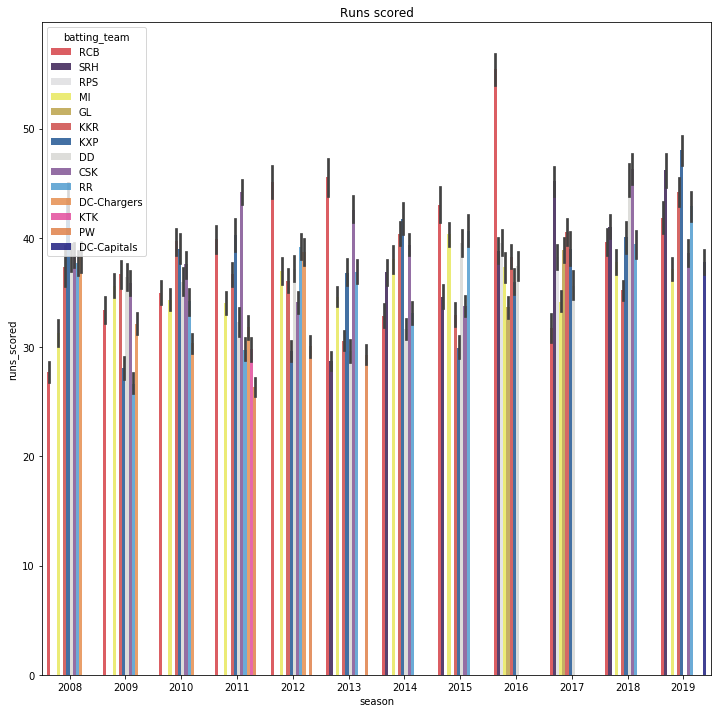

In [55]:
plt.figure(figsize=(12,12))
sns.barplot(data=df_batsman,x='season',y='runs_scored',hue='batting_team',alpha=0.8,).set_title('Runs scored');

In [56]:
df_batsman['batting_strike_rate'].mean()

1.247049312853695

In [57]:
df_strike_rate_by_team_by_season = df_batsman.groupby(['season','batting_team'],as_index=False)['batting_strike_rate'].mean()

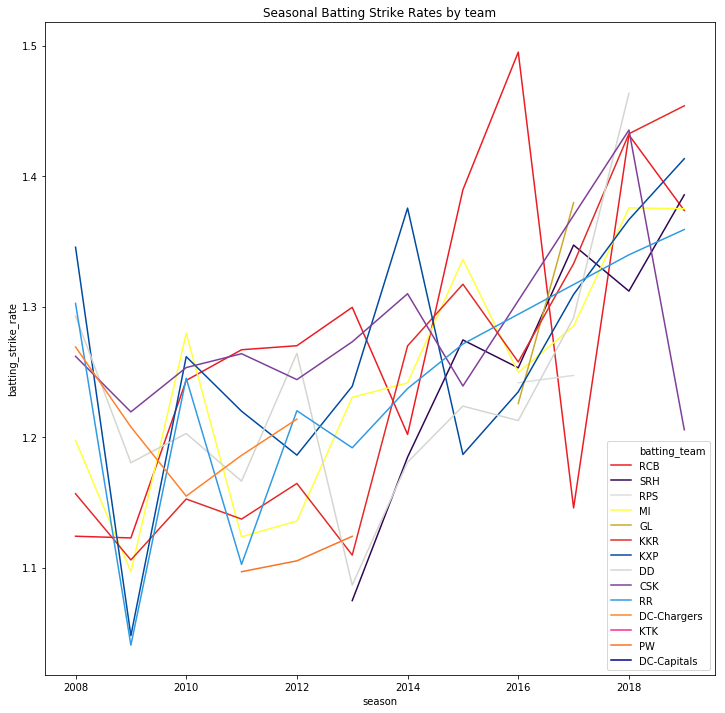

In [58]:
plt.figure(figsize=(12,12))
sns.lineplot(x='season',y='batting_strike_rate',hue='batting_team',hue_order=list_of_teams,data=df_strike_rate_by_team_by_season).set_title('Seasonal Batting Strike Rates by team');

# Lets calculate the team batting strike rates

In [59]:
list_of_seasons = list(df_batsman['season'].unique())
list_of_seasons

[2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018, 2019]

In [60]:
team_batsman_performances = []


for team in list_of_teams:
    team_batsman_performances.append(df_batsman[df_batsman['batting_team'] == team])


team_batsman_seasonal_performances = []

for season in list_of_seasons:
    for team in list_of_teams:
        team_batsman_seasonal_performances.append(df_batsman[(df_batsman['batting_team'] == team) & (df_batsman['season'] == season)])

In [61]:
team_strikes = [x['batting_strike_rate'].mean() for x in team_batsman_seasonal_performances]

In [62]:
len(team_strikes)

168

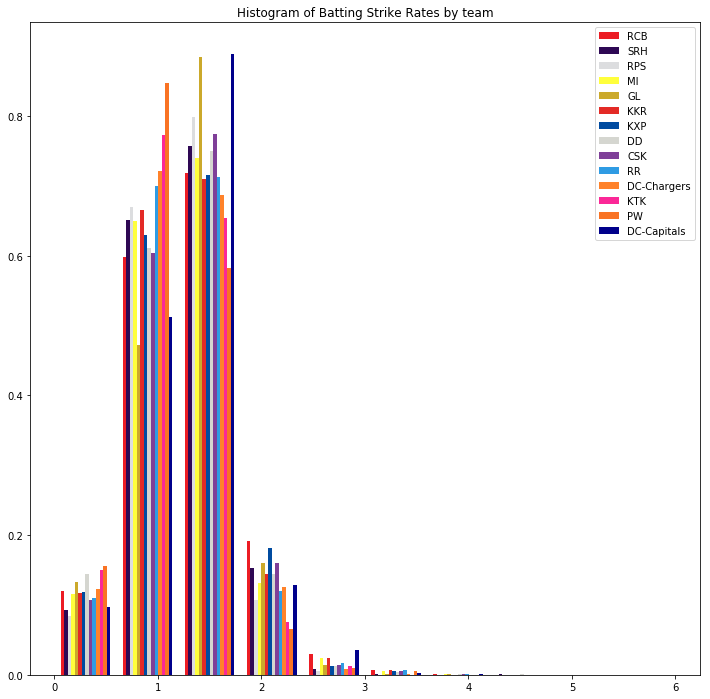

In [63]:
plt.figure(figsize=(12,12))
plt.hist([x['batting_strike_rate'] for x in team_batsman_performances], density=1, histtype='bar',label=[x for x in list_of_teams]);
plt.legend();
plt.title('Histogram of Batting Strike Rates by team');

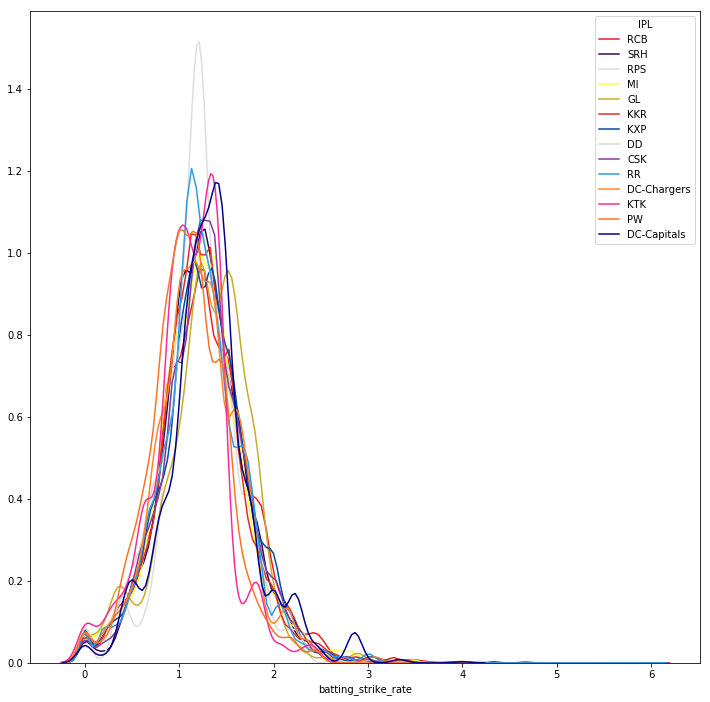

In [64]:
plt.figure(figsize=(12,12))
for i in range(len(list_of_teams)):
    g = sns.distplot(team_batsman_performances[i]['batting_strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL', loc='upper right')
plt.show(g)

In [65]:
print(list_of_teams)
print(list_of_seasons)

['RCB', 'SRH', 'RPS', 'MI', 'GL', 'KKR', 'KXP', 'DD', 'CSK', 'RR', 'DC-Chargers', 'KTK', 'PW', 'DC-Capitals']
[2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018, 2019]


# Analyze one team's batting strikes, say RCB

RCB is at index 0, 14, 28 etc.

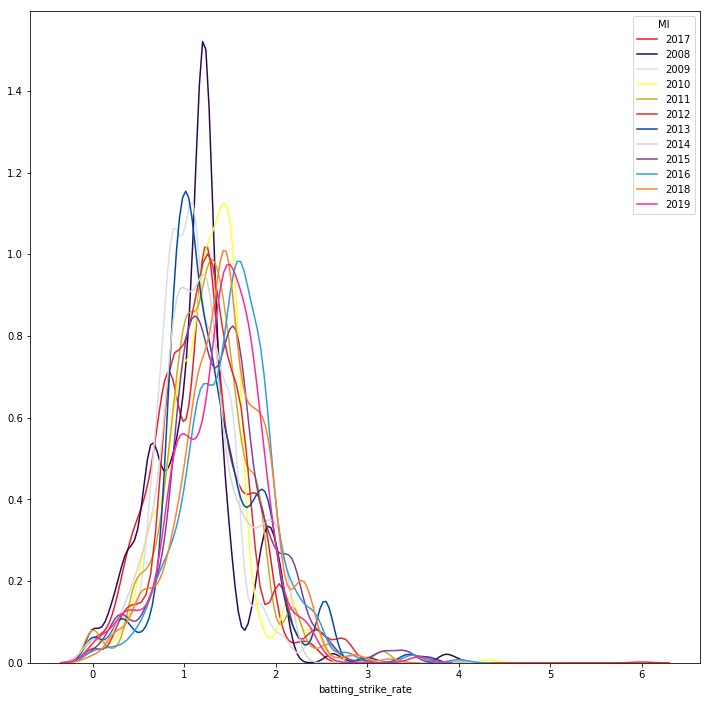

In [66]:
plt.figure(figsize=(12,12))
for i in range(len(list_of_seasons)):
    g = sns.distplot(team_batsman_seasonal_performances[14*i]['batting_strike_rate'],rug=False,hist=False,label=list_of_seasons[i])

plt.legend(title='MI', loc='upper right')
plt.show(g)

Runs being scored by season



Runs by innings by season

Highest run scorer

In [67]:
df_batsman.head()

,match_id,season,date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,...,1s,2s,3s,5s,net_balls_faced,batting_strike_rate,inning,player_dismissed,out,batting_team
0,1,2017,2017-05-04,A Choudhary,6,2,0,1,1,2.0,...,0,0,0,0,2,3.000000,NaN,NaN,NaN,RCB
1,1,2017,2017-05-04,A Choudhary,6,2,0,1,1,2.0,...,0,0,0,0,2,3.000000,NaN,NaN,NaN,RCB
2,1,2017,2017-05-04,BCJ Cutting,16,6,0,2,1,6.0,...,2,1,0,0,6,2.666667,NaN,NaN,NaN,SRH
3,1,2017,2017-05-04,BCJ Cutting,16,6,0,2,1,6.0,...,2,1,0,0,6,2.666667,NaN,NaN,NaN,SRH
4,1,2017,2017-05-04,BCJ Cutting,16,6,0,2,1,6.0,...,2,1,0,0,6,2.666667,NaN,NaN,NaN,SRH


Lets add a few more features # of 200s, 100s, 50s etc, Whats the scoring pattern - more dots, boundaries etc

In [68]:
def flag_200s(row):
    '''
    This function flags innings where the batsman scored over 200s
    INPUT: A row in a DataFrame
    OUTPUT: 1 if 200 was scored and 0 otherwise
    '''   
    if row['runs_scored'] >= 200:
        value = 1
    else:
        value = 0
    return value

def flag_100s(row):
    '''
    This function flags innings where the batsman scored >= 100s and < 200
    INPUT: A row in a DataFrame
    OUTPUT: 1 if 100 was scored and 0 otherwise
    '''   
    if (row['runs_scored'] >= 100) & (row['runs_scored'] < 200):
        value = 1
    else:
        value = 0
    return value

def flag_50s(row):
    '''
    This function flags innings where the batsman scored >= 50s and < 100
    INPUT: A row in a DataFrame
    OUTPUT: 1 if 50 was scored and 0 otherwise
    '''   

    if (row['runs_scored'] >= 50) & (row['runs_scored'] < 100):
        value = 1
    else:
        value = 0
    return value

def flag_30s(row):
    '''
    This function flags innings where the batsman scored >=30 and < 50
    INPUT: A row in a DataFrame
    OUTPUT: 1 if 30 was scored and 0 otherwise
    '''   

    if (row['runs_scored'] >= 30) & (row['runs_scored'] < 50):
        value = 1
    else:
        value = 0
    return value

def calc_boundary_hit_rate(row):
    '''
    This function provides the proportion of balls in which scores of 4, 5 or 6 were scored in the innings
    INPUT: A row in a DataFrame
    OUTPUT: % of balls where scores of 4, 5 or 6 were scored
    '''   
    if row['net_balls_faced'] != 0:
        value = (row['6s']+row['5s']+row['4s'])/row['net_balls_faced']
    else:
        value = 0
    return value

def calc_farming_rate(row):
    '''
    This function provides the proportion of balls in which scores of 1, 2 or 3 were scored in the innings
    INPUT: A row in a DataFrame
    OUTPUT: % of balls where scores of 1, 2 or 3 were scored
    '''   
    if row['net_balls_faced'] != 0:
        value = (row['3s']+row['2s']+row['1s'])/row['net_balls_faced']
    else:
        value = 0
    return value

def calc_dot_ball_rate(row):
    '''
    This function provides the proportion of balls in which no scores were made in the innings
    INPUT: A row in a DataFrame
    OUTPUT: % of balls where 0 runs were scored
    '''   

    if row['net_balls_faced'] != 0:
        value = (row['dot_balls'])/row['net_balls_faced']
    else:
        value = 0
    return value

In [69]:
# Apply the lambda functions to create flags for runs of 30, 50, 100, 200, boundary_rate, farming_rate and dot_rate

df_batsman['200s'] = df_batsman.apply(lambda row: flag_200s(row),axis=1)
df_batsman['100s'] = df_batsman.apply(lambda row: flag_100s(row),axis=1)
df_batsman['50s'] = df_batsman.apply(lambda row: flag_50s(row),axis=1)
df_batsman['30s'] = df_batsman.apply(lambda row: flag_30s(row),axis=1)
df_batsman['boundary_hit_rate'] = df_batsman.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman['farming_rate'] = df_batsman.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman['dot_rate'] = df_batsman.apply(lambda row: calc_dot_ball_rate(row),axis=1)

In [70]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179365 entries, 0 to 179364
Data columns (total 28 columns):
match_id               179365 non-null int64
season                 179365 non-null int64
date                   179365 non-null datetime64[ns]
batsman                179365 non-null object
runs_scored            179365 non-null int64
gross_balls_faced      179365 non-null int64
4s                     179365 non-null int64
6s                     179365 non-null int64
dot_balls              179365 non-null int64
wides_faced            179365 non-null float64
no_balls_faced         179365 non-null float64
1s                     179365 non-null int64
2s                     179365 non-null int64
3s                     179365 non-null int64
5s                     179365 non-null int64
net_balls_faced        179365 non-null int64
batting_strike_rate    179365 non-null float64
inning                 138500 non-null float64
player_dismissed       138500 non-null object
out            

In [71]:
df_batsman.tail()

,match_id,season,date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,...,player_dismissed,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
179360,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,SR Watson,1.0,CSK,0,0,1,0,0.193548,0.387097,0.419355
179361,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,SR Watson,1.0,CSK,0,0,1,0,0.193548,0.387097,0.419355
179362,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,SR Watson,1.0,CSK,0,0,1,0,0.193548,0.387097,0.419355
179363,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,SR Watson,1.0,CSK,0,0,1,0,0.193548,0.387097,0.419355
179364,11415,2019,2019-12-05,SR Watson,84,62,8,4,26,62.0,...,SR Watson,1.0,CSK,0,0,1,0,0.193548,0.387097,0.419355


In [72]:
# List of the top scores made - CH Gayle's 175 in 2013 was the highest
df_batsman[['season','batsman','runs_scored','net_balls_faced','100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls','batting_strike_rate']].sort_values(by=['runs_scored'],ascending=False).head(10)

,season,batsman,runs_scored,net_balls_faced,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,batting_strike_rate
97431,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232
97457,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232
97463,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232
97462,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232
97461,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232
97460,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232
97459,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232
97458,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232
97456,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232
97465,2013,CH Gayle,175,69,1,0,0,17,0,13,0,0,21,18,2.536232


In [73]:
def calc_batting_strike_rate(row):
    '''
    This function provides the strike rate for the batsman in an innings
    INPUT: A row in a DataFrame
    OUTPUT: # of runs scored per ball
    '''   
  
    if row['net_balls_faced'] != 0:
        value = row['runs_scored']/row['net_balls_faced']
    else:
        value = 0
    return value

def calc_batting_avg(row):
    '''
    This function provides the batting average for the batsman
    INPUT: A row in a DataFrame
    OUTPUT: batting average
    '''   
    if row['out'] != 0:
        value = row['runs_scored']/row['out']
    else:
        value = 0
    return value

def calc_balls_per_inning(row):
    '''
    This function provides the average number of balls faced by a batsman per inning
    INPUT: A row in a DataFrame
    OUTPUT: # of balls faced per inning
    '''   

    if row['out'] != 0:
        value = row['net_balls_faced']/row['out']
    else:
        value = 0
    return value

In [74]:
df_batsman_seasonal_stats = df_batsman[['season','batsman','runs_scored','gross_balls_faced','net_balls_faced',\
                                        'out','100s','50s','30s','6s','5s','4s','3s','2s',\
                                        '1s','dot_balls','batting_strike_rate']].groupby(['season','batsman'],as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                                                          '100s','50s','30s','6s','5s','4s','3s',\
                                                                                          '2s','1s','dot_balls'].sum()

In [75]:
df_batsman_seasonal_stats.head(10)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls
0,2008,A Chopra,854,999,999,55.0,0,0,0,0,0,111,0,50,310,528
1,2008,A Kumble,87,115,115,15.0,0,0,0,0,0,8,0,1,53,53
2,2008,A Mishra,1022,1074,1074,42.0,0,0,32,0,0,96,0,37,564,377
3,2008,A Mukund,0,1,1,1.0,0,0,0,0,0,0,0,0,0,1
4,2008,A Nehra,22,105,105,1.0,0,0,0,0,0,0,0,0,22,83
5,2008,A Symonds,8137,5099,5099,54.0,57,0,41,481,0,735,57,225,1690,1911
6,2008,AA Noffke,108,144,144,12.0,0,0,0,0,0,12,0,0,60,72
7,2008,AB Agarkar,635,559,559,47.0,0,0,0,30,0,54,0,47,145,283
8,2008,AB Dinda,4,10,10,3.0,0,0,0,0,0,0,0,0,4,6
9,2008,AB de Villiers,1998,2072,2072,78.0,0,0,0,17,0,103,0,347,790,815


In [76]:
df_batsman_seasonal_stats['season_batting_strike_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_batsman_seasonal_stats['season_batting_avg'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_avg(row),axis=1)
df_batsman_seasonal_stats['balls_per_inning'] = df_batsman_seasonal_stats.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_batsman_seasonal_stats['boundary_hit_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman_seasonal_stats['farming_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman_seasonal_stats['dot_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_dot_ball_rate(row),axis=1)

df_batsman_seasonal_stats.head()

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,...,3s,2s,1s,dot_balls,season_batting_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,2008,A Chopra,854,999,999,55.0,0,0,0,0,...,0,50,310,528,0.854855,15.527273,18.163636,0.111111,0.360360,0.528529
1,2008,A Kumble,87,115,115,15.0,0,0,0,0,...,0,1,53,53,0.756522,5.800000,7.666667,0.069565,0.469565,0.460870
2,2008,A Mishra,1022,1074,1074,42.0,0,0,32,0,...,0,37,564,377,0.951583,24.333333,25.571429,0.089385,0.559590,0.351024
3,2008,A Mukund,0,1,1,1.0,0,0,0,0,...,0,0,0,1,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,2008,A Nehra,22,105,105,1.0,0,0,0,0,...,0,0,22,83,0.209524,22.000000,105.000000,0.000000,0.209524,0.790476


In [77]:
df_batsman_seasonal_stats.sort_values(by=['season_batting_avg','season_batting_strike_rate','balls_per_inning'],ascending=False).head(20)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,...,3s,2s,1s,dot_balls,season_batting_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
19,2008,BB McCullum,12481,6102,6102,19.0,77,0,0,1025,...,0,705,1725,1848,2.045395,656.894737,321.157895,0.298918,0.398230,0.302852
1172,2015,JA Morkel,4386,3554,3554,8.0,0,59,0,67,...,0,295,1494,1223,1.234102,548.250000,444.250000,0.152504,0.503376,0.344119
60,2008,LA Pomersbach,5381,3569,3569,12.0,0,52,24,252,...,0,116,1269,1340,1.507705,448.416667,297.416667,0.236481,0.388064,0.375455
513,2011,DL Vettori,400,482,482,1.0,0,0,0,21,...,0,0,190,250,0.829876,400.000000,482.000000,0.087137,0.394191,0.518672
1244,2015,UT Yadav,322,174,174,1.0,0,0,0,13,...,0,0,28,79,1.850575,322.000000,174.000000,0.385057,0.160920,0.454023
1544,2018,Ankit Sharma,1135,537,537,4.0,0,0,20,91,...,0,51,247,88,2.113594,283.750000,134.250000,0.281192,0.554935,0.163873
227,2009,MK Pandey,10156,6786,6786,44.0,74,0,35,296,...,0,1176,2088,2241,1.496611,230.818182,154.227273,0.188771,0.480990,0.330239
1341,2016,P Sahu,217,145,145,1.0,0,0,0,12,...,0,24,49,48,1.496552,217.000000,145.000000,0.165517,0.503448,0.331034
947,2013,R Vinay Kumar,863,622,622,4.0,0,0,0,18,...,0,95,177,235,1.387460,215.750000,155.500000,0.184887,0.437299,0.377814
1155,2015,DW Steyn,210,123,123,1.0,0,0,0,0,...,0,11,56,23,1.707317,210.000000,123.000000,0.268293,0.544715,0.186992


In [78]:
df_batsman_seasonal_stats.query('batsman=="MS Dhoni"')

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,...,3s,2s,1s,dot_balls,season_batting_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
76,2008,MS Dhoni,12271,9385,9385,194.0,0,75,169,466,...,75,765,3328,3653,1.307512,63.252577,48.376289,0.166649,0.444113,0.389238
232,2009,MS Dhoni,8912,6934,6934,132.0,0,66,56,233,...,30,594,3600,1818,1.285261,67.515152,52.530303,0.128641,0.609172,0.262186
398,2010,MS Dhoni,7694,5483,5483,153.0,0,62,81,232,...,0,542,2434,1579,1.403246,50.287582,35.836601,0.169250,0.542769,0.287981
567,2011,MS Dhoni,9452,5715,5715,144.0,0,71,39,599,...,21,454,2531,1521,1.653893,65.638889,39.687500,0.207874,0.525984,0.266142
751,2012,MS Dhoni,7171,5719,5719,199.0,0,20,84,160,...,28,796,2559,1682,1.253891,36.035176,28.738693,0.114356,0.591537,0.294107
918,2013,MS Dhoni,12984,8390,8390,147.0,0,152,65,784,...,55,744,3003,2898,1.547557,88.326531,57.074830,0.201430,0.453159,0.345411
1066,2014,MS Dhoni,8359,5920,5920,60.0,0,42,77,495,...,59,561,2246,2098,1.411993,139.316667,98.666667,0.161486,0.484122,0.354392
1197,2015,MS Dhoni,9115,7591,7591,188.0,0,29,125,402,...,0,600,2847,3078,1.200764,48.484043,40.377660,0.140429,0.454090,0.405480
1332,2016,MS Dhoni,7059,5550,5550,120.0,0,36,80,331,...,36,471,2255,2015,1.271892,58.825000,46.250000,0.139279,0.497658,0.363063
1471,2017,MS Dhoni,6936,5875,5875,168.0,0,35,52,410,...,0,478,1972,2628,1.180596,41.285714,34.970238,0.135660,0.417021,0.447319


# Compare the top 10 all-time run scorers in the IPL along various parameters

In [79]:
# Create a data frame of the top 10 batsman for each season sorted by runs_scored 
df_top_ten_batsmen = pd.DataFrame(df_batsman_seasonal_stats.\
                      groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))

top_ten_batsmen_list = df_top_ten_batsmen['batsman']

In [80]:
# Also, create a dataframe of the top 10 all time batsmen and create the strike rate, average and balls per inning
df_top10_batsmen_alltime_comparison = df_batsman_seasonal_stats.groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @top_ten_batsmen_list') 

df_top10_batsmen_alltime_comparison['ipl_strike_rate'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_top10_batsmen_alltime_comparison['ipl_batting_avg'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_batting_avg(row),axis=1)
df_top10_batsmen_alltime_comparison['ipl_balls_per_inning'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_top10_batsmen_alltime_comparison['boundary_hit_rate'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_top10_batsmen_alltime_comparison['farming_rate'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_farming_rate(row),axis=1)
df_top10_batsmen_alltime_comparison['dot_rate'] = df_top10_batsmen_alltime_comparison.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_top10_batsmen_alltime_comparison = df_top10_batsmen_alltime_comparison.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)
df_top10_batsmen_alltime_comparison

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,...,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,V Kohli,207140,152717,152717,3315.0,286,1768,1039,7517,0,...,401,11666,65283,49795,1.356365,62.485671,46.068477,0.167447,0.506492,0.326061
1,DA Warner,194244,134403,134403,2649.0,242,1955,545,7509,94,...,757,11793,50575,45603,1.445236,73.327293,50.737259,0.191030,0.469670,0.339300
2,CH Gayle,191420,124677,124677,2415.0,433,1354,591,14102,0,...,143,3500,39991,52094,1.535327,79.262940,51.626087,0.232192,0.349976,0.417832
3,SK Raina,176400,126274,126274,2944.0,54,1649,987,6419,53,...,284,8872,55153,39525,1.396962,59.918478,42.891984,0.177709,0.509281,0.313010
4,S Dhawan,168875,132596,132596,2857.0,0,1727,838,3528,68,...,667,7881,54668,47050,1.273606,59.109205,46.410921,0.168406,0.476756,0.354837
5,RG Sharma,166067,121564,121564,2860.0,62,1554,873,6828,44,...,66,6604,51715,41384,1.366087,58.065385,42.504895,0.179107,0.480282,0.340430
6,G Gambhir,157142,125244,125244,2796.0,0,1723,700,2185,0,...,552,9636,50600,44145,1.254687,56.202432,44.793991,0.162171,0.485357,0.352472
7,AM Rahane,153231,121513,121513,2438.0,125,1379,844,3121,12,...,481,9136,51798,41232,1.261026,62.851107,49.841263,0.155259,0.505419,0.339322
8,AB de Villiers,148298,94393,94393,1912.0,168,1332,493,7413,0,...,580,7125,39910,27385,1.571070,77.561715,49.368724,0.205450,0.504434,0.290117
9,RV Uthappa,138015,105494,105494,2951.0,0,1039,1188,4686,110,...,334,6464,41155,39179,1.308273,46.768892,35.748560,0.174057,0.454557,0.371386


# Lets get the same stats for the period 2017-2019 and just 2019 respecively

In [81]:
# create a dataframe of the top 10 batsmen for the seasons 2017, 2018 and 2019
df_top_ten_batsmen_last_3_years = pd.DataFrame(df_batsman_seasonal_stats.query('season == 2017 |season == 2018 |season == 2019')\
                                                                               .groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))

top_ten_batsmen_list_last_3_years = df_top_ten_batsmen_last_3_years['batsman']
                                               
df_top10_batsmen_last_3_years_comparison = df_batsman_seasonal_stats.query('season == 2017 |season == 2018 |season == 2019').groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @top_ten_batsmen_list_last_3_years') 

df_top10_batsmen_last_3_years_comparison['ipl_strike_rate'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_top10_batsmen_last_3_years_comparison['ipl_batting_avg'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_batting_avg(row),axis=1)
df_top10_batsmen_last_3_years_comparison['ipl_balls_per_inning'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_top10_batsmen_last_3_years_comparison['boundary_hit_rate'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_top10_batsmen_last_3_years_comparison['farming_rate'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_farming_rate(row),axis=1)
df_top10_batsmen_last_3_years_comparison['dot_rate'] = df_top10_batsmen_last_3_years_comparison.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_top10_batsmen_last_3_years_comparison = df_top10_batsmen_last_3_years_comparison.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)
df_top10_batsmen_last_3_years_comparison

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,...,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,DA Warner,62182,42768,42768,684.0,115,559,199,2171,94,...,337,4551,17449,12885,1.453938,90.909357,62.526316,0.176440,0.522283,0.301277
1,S Dhawan,58230,42098,42098,917.0,0,571,273,1268,7,...,138,2298,19005,12739,1.383201,63.500545,45.908397,0.188085,0.509312,0.302603
2,KL Rahul,57042,38829,38829,570.0,136,496,107,2275,0,...,0,3464,16732,11425,1.469057,100.073684,68.121053,0.185634,0.520127,0.294239
3,RR Pant,53834,30467,30467,783.0,64,417,280,3211,69,...,36,1779,12557,8315,1.766961,68.753512,38.910600,0.255358,0.471724,0.272918
4,V Kohli,50632,36110,36110,839.0,58,504,181,1578,0,...,19,2933,17005,10016,1.402160,60.348033,43.039333,0.169953,0.552672,0.277375
5,SS Iyer,43640,32242,32242,812.0,0,384,338,1544,46,...,4,1875,14836,10050,1.353514,53.743842,39.706897,0.169872,0.518423,0.311705
6,SK Raina,43490,31303,31303,692.0,0,445,259,1195,0,...,41,1626,15397,8657,1.389324,62.846821,45.235549,0.178322,0.545123,0.276555
7,CA Lynn,43214,29778,29778,753.0,0,427,247,2010,61,...,0,1429,11307,10824,1.451206,57.389110,39.545817,0.207737,0.427698,0.363490
8,CH Gayle,43147,28101,28101,597.0,133,284,141,3021,0,...,0,803,10219,10759,1.535426,72.273032,47.070352,0.224903,0.392228,0.382869
9,KS Williamson,42896,29416,29416,627.0,0,516,158,1701,24,...,110,2425,13446,8224,1.458254,68.414673,46.915470,0.177148,0.543276,0.279576


create the same for only 2019 season

In [82]:
df_top_ten_batsmen_2019 = pd.DataFrame(df_batsman_seasonal_stats.query('season == 2019')\
                                                                               .groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))

top_ten_batsmen_list_2019 = df_top_ten_batsmen_2019['batsman']
                                               
df_top_ten_batsmen_2019 = df_batsman_seasonal_stats.query('season == 2019').groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @top_ten_batsmen_list_2019') 

df_top_ten_batsmen_2019['ipl_strike_rate'] = df_top_ten_batsmen_2019.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_top_ten_batsmen_2019['ipl_batting_avg'] = df_top_ten_batsmen_2019.apply(lambda row: calc_batting_avg(row),axis=1)
df_top_ten_batsmen_2019['ipl_balls_per_inning'] = df_top_ten_batsmen_2019.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_top_ten_batsmen_2019['boundary_hit_rate'] = df_top_ten_batsmen_2019.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_top_ten_batsmen_2019['farming_rate'] = df_top_ten_batsmen_2019.apply(lambda row: calc_farming_rate(row),axis=1)
df_top_ten_batsmen_2019['dot_rate'] = df_top_ten_batsmen_2019.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_top_ten_batsmen_2019 = df_top_ten_batsmen_2019.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)
df_top_ten_batsmen_2019

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,...,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,DA Warner,34342,23408,23408,378.0,55,376,33,1037,94,...,217,3126,10259,6053,1.467105,90.851852,61.925926,0.160330,0.581083,0.258587
1,KL Rahul,29473,21201,21201,270.0,66,301,29,1192,0,...,0,2100,9349,6367,1.390170,109.159259,78.522222,0.159662,0.540022,0.300316
2,CH Gayle,20762,13056,13056,270.0,68,127,79,1282,0,...,0,440,4934,4586,1.590227,76.896296,48.355556,0.237132,0.411612,0.351256
3,Q de Kock,20084,14328,14328,348.0,0,200,95,819,0,...,23,1098,6253,4472,1.401731,57.712644,41.172414,0.173227,0.514657,0.312116
4,S Dhawan,19561,14046,14046,311.0,0,220,85,381,0,...,8,918,6259,4191,1.392638,62.897106,45.163987,0.190090,0.511534,0.298377
5,J Bairstow,19147,11489,11489,202.0,57,120,96,842,0,...,91,748,4626,3257,1.666551,94.787129,56.876238,0.240839,0.475672,0.283489
6,V Kohli,18250,12394,12394,332.0,58,103,66,441,0,...,0,1132,6136,2884,1.472487,54.969880,37.331325,0.180894,0.586413,0.232693
7,SS Iyer,17580,14120,14120,348.0,0,142,172,461,0,...,0,794,6966,4334,1.245042,50.517241,40.574713,0.143484,0.549575,0.306941
8,AB de Villiers,16750,10336,10336,168.0,0,211,0,1046,0,...,97,532,4819,2767,1.620550,99.702381,61.523810,0.205205,0.527090,0.267705
9,SR Watson,15923,10996,10996,295.0,0,150,56,836,34,...,0,551,3727,4371,1.448072,53.976271,37.274576,0.213441,0.389051,0.397508


In [83]:
df_top_ten_batsmen_2019[['batsman','runs_scored','ipl_strike_rate','ipl_batting_avg','ipl_balls_per_inning','boundary_hit_rate',]]

,batsman,runs_scored,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate
0,DA Warner,34342,1.467105,90.851852,61.925926,0.160330
1,KL Rahul,29473,1.390170,109.159259,78.522222,0.159662
2,CH Gayle,20762,1.590227,76.896296,48.355556,0.237132
3,Q de Kock,20084,1.401731,57.712644,41.172414,0.173227
4,S Dhawan,19561,1.392638,62.897106,45.163987,0.190090
5,J Bairstow,19147,1.666551,94.787129,56.876238,0.240839
6,V Kohli,18250,1.472487,54.969880,37.331325,0.180894
7,SS Iyer,17580,1.245042,50.517241,40.574713,0.143484
8,AB de Villiers,16750,1.620550,99.702381,61.523810,0.205205
9,SR Watson,15923,1.448072,53.976271,37.274576,0.213441


Create plots to compare the batsmen along different parameters

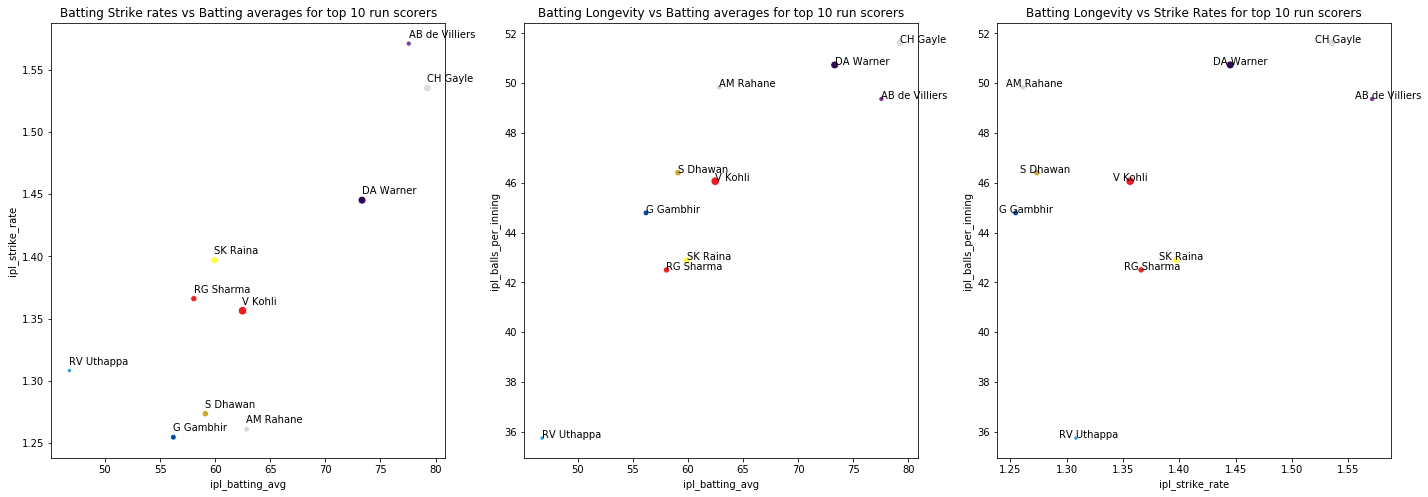

In [84]:
plt.figure(figsize=(24,8))

gs_batsman_1 = gridspec.GridSpec(1, 3)
plt.subplot(gs_batsman_1[0, 0])
p_batsman_1 = sns.scatterplot(x="ipl_batting_avg", y="ipl_strike_rate",\
                     hue='batsman', hue_order=top_ten_batsmen_list,size='runs_scored',\
                     data=df_top10_batsmen_alltime_comparison,legend=False\
                     
                    );
for line in range(0,df_top10_batsmen_alltime_comparison.shape[0]):
    p_batsman_1.text(df_top10_batsmen_alltime_comparison.ipl_batting_avg[line]-0.015,\
                   df_top10_batsmen_alltime_comparison.ipl_strike_rate[line]+0.005,\
                   df_top10_batsmen_alltime_comparison.batsman[line])

p_batsman_1.set_title('Batting Strike rates vs Batting averages for top 10 run scorers')

plt.subplot(gs_batsman_1[0, 1])
p_batsman_2 = sns.scatterplot(x="ipl_batting_avg", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=top_ten_batsmen_list,size='runs_scored',\
                     data=df_top10_batsmen_alltime_comparison,legend=False\
                     
                    );
for line in range(0,df_top10_batsmen_alltime_comparison.shape[0]):
    p_batsman_2.text(df_top10_batsmen_alltime_comparison.ipl_batting_avg[line]-0.015,\
                   df_top10_batsmen_alltime_comparison.ipl_balls_per_inning[line]+0.005,\
                   df_top10_batsmen_alltime_comparison.batsman[line])

p_batsman_2.set_title('Batting Longevity vs Batting averages for top 10 run scorers')


plt.subplot(gs_batsman_1[0, 2])
p_batsman_3 = sns.scatterplot(x="ipl_strike_rate", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=top_ten_batsmen_list,size='runs_scored',\
                     data=df_top10_batsmen_alltime_comparison,legend=False\
                     
                    );
for line in range(0,df_top10_batsmen_alltime_comparison.shape[0]):
    p_batsman_3.text(df_top10_batsmen_alltime_comparison.ipl_strike_rate[line]-0.015,\
                   df_top10_batsmen_alltime_comparison.ipl_balls_per_inning[line]+0.005,\
                   df_top10_batsmen_alltime_comparison.batsman[line])

p_batsman_3.set_title('Batting Longevity vs Strike Rates for top 10 run scorers');

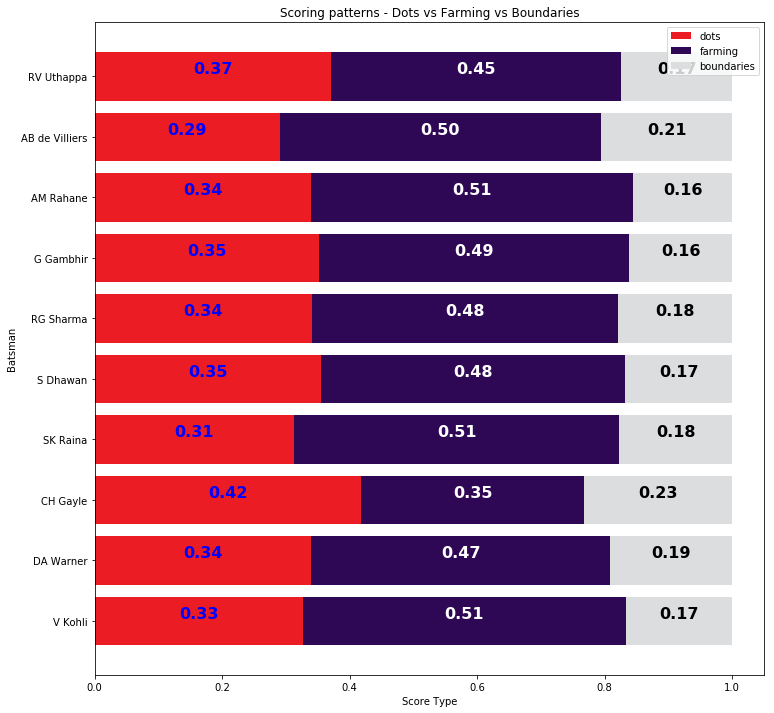

In [85]:
plt.figure(figsize=(12,12))

p_batsman_4 = plt.barh(y=df_top10_batsmen_alltime_comparison['batsman'],width=df_top10_batsmen_alltime_comparison['dot_rate'])
p_batsman_5 = plt.barh(y=df_top10_batsmen_alltime_comparison['batsman'],width=df_top10_batsmen_alltime_comparison['farming_rate'],\
                       left=df_top10_batsmen_alltime_comparison['dot_rate'])
p_batsman_6 = plt.barh(y=df_top10_batsmen_alltime_comparison['batsman'],width=df_top10_batsmen_alltime_comparison['boundary_hit_rate'],\
                       left=df_top10_batsmen_alltime_comparison['dot_rate']+df_top10_batsmen_alltime_comparison['farming_rate'])


for r1, r2, r3 in zip(p_batsman_4, p_batsman_5, p_batsman_6):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % w1,ha="center", va="bottom", color="blue", fontsize=16, fontweight="bold")
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % w2,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % w3,ha="center", va="bottom", color="black", fontsize=16, fontweight="bold")
        
    

plt.ylabel('Batsman')
plt.xlabel('Score Type')
plt.title('Scoring patterns - Dots vs Farming vs Boundaries')

plt.legend((p_batsman_4,p_batsman_5,p_batsman_6),('dots','farming','boundaries'),loc='best')

plt.show()

Lets visualize a few more plots of our batsmen performances to compare the top 10 all time run scorers along different parameters

In [86]:
df_best_batsman = df_batsman.merge(df_top_ten_batsmen,how='right',left_on=['batsman'],right_on=['batsman'])
df_best_batsman.head()

,match_id,season,date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,...,player_dismissed,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
0,1,2017,2017-05-04,CH Gayle,32,23,2,3,13,23.0,...,CH Gayle,1.0,RCB,0,0,0,1,0.217391,0.217391,0.565217
1,1,2017,2017-05-04,CH Gayle,32,23,2,3,13,23.0,...,CH Gayle,1.0,RCB,0,0,0,1,0.217391,0.217391,0.565217
2,1,2017,2017-05-04,CH Gayle,32,23,2,3,13,23.0,...,CH Gayle,1.0,RCB,0,0,0,1,0.217391,0.217391,0.565217
3,1,2017,2017-05-04,CH Gayle,32,23,2,3,13,23.0,...,CH Gayle,1.0,RCB,0,0,0,1,0.217391,0.217391,0.565217
4,1,2017,2017-05-04,CH Gayle,32,23,2,3,13,23.0,...,CH Gayle,1.0,RCB,0,0,0,1,0.217391,0.217391,0.565217


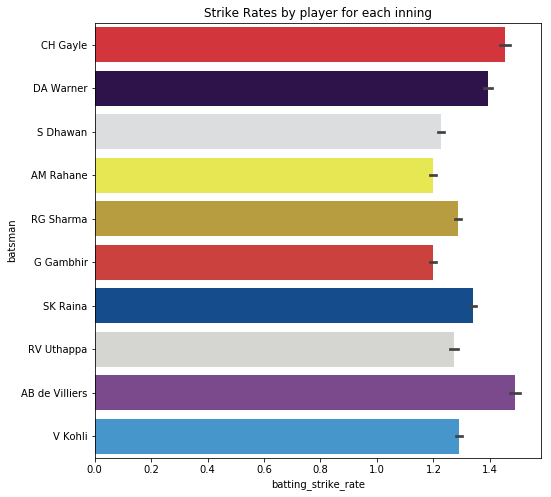

In [87]:
# Create a swarm plot for each inning
plt.figure(figsize=(8,8));
sns.barplot(data=df_best_batsman,x='batting_strike_rate',y='batsman').set_title('Strike Rates by player for each inning');

In [88]:
# who's got the most number of player of the match
matches['player_of_match'].value_counts()

CH Gayle             21
AB de Villiers       20
DA Warner            17
MS Dhoni             17
RG Sharma            17
YK Pathan            16
SR Watson            15
SK Raina             14
G Gambhir            13
MEK Hussey           12
V Kohli              12
AM Rahane            12
V Sehwag             11
AD Russell           11
A Mishra             11
DR Smith             11
JH Kallis            10
KA Pollard           10
SE Marsh              9
SP Narine             9
AT Rayudu             9
RA Jadeja             8
SR Tendulkar          8
UT Yadav              8
Harbhajan Singh       8
AC Gilchrist          7
RV Uthappa            7
Rashid Khan           7
A Nehra               6
S Dhawan              6
                     ..
CRD Fernando          1
Q de Kock             1
DJ Hooda              1
AD Mathews            1
Mustafizur Rahman     1
S Anirudha            1
S Sreesanth           1
M Kartik              1
RA Tripathi           1
TG Southee            1
S Nadeem        

In [89]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 47 columns):
match_id                      179078 non-null int64
inning                        179078 non-null int64
batting_team                  179078 non-null object
bowling_team                  179078 non-null object
over                          179078 non-null object
ball                          179078 non-null int64
batsman                       179078 non-null object
non_striker                   179078 non-null object
bowler                        179078 non-null object
is_super_over                 179078 non-null int64
wide_runs                     179078 non-null int64
bye_runs                      179078 non-null int64
legbye_runs                   179078 non-null int64
noball_runs                   179078 non-null int64
penalty_runs                  179078 non-null int64
batsman_runs                  179078 non-null int64
extra_runs                    179078 non-null int64

In [90]:
# Lets now analyze a random match by how each inning progressed 
deliveries.query('match_id==1' ).groupby(['inning','inning_quarter'],as_index=False)['total_runs','batsman_runs','extra_runs','bye_runs','legbye_runs','wide_runs','noball_runs'].sum()

,inning,inning_quarter,total_runs,batsman_runs,extra_runs,bye_runs,legbye_runs,wide_runs,noball_runs
0,1,Q1,42,38,4,0,1,2,1
1,1,Q2,46,46,0,0,0,0,0
2,1,Q3,63,62,1,0,0,1,0
3,1,Q4,56,54,2,0,0,2,0
4,2,Q1,48,46,2,0,0,2,0
5,2,Q2,50,48,2,0,0,1,1
6,2,Q3,41,40,1,0,0,1,0
7,2,Q4,33,32,1,0,1,0,0


# Bowler Statistics Analyzed

Create a df_bowler DataFrame to start tracking bowling performances

In [91]:
# Now we create similar comparisons for best bowling performances
# Define the aggregation calculations
bowler_aggregations = {\
                       
    'ball': {'balls_bowled': 'count'},\
    'batsman_runs': {'batsman_runs_conceded':'sum'},\
    'total_runs': { 'total_runs_conceded': 'sum'},\
    'extra_runs': { 'extras conceded': 'sum'},\
    'wide_runs': {'extras_wides':'sum'},\
    'noball_runs': {'extras_noballs':'sum'},\
    'bye_runs': {'extras_byes':'sum'},\
    'legbye_runs': {'extras_legbyes':'sum'},\
    'player_dismissed': {'wickets_incl_run_outs': 'count'},\
    'dismissal_kind' : {'wicket_type':'count'},\
    'wicket_attributed_to':{'wickets_for_bowler':'count'},\
    'dot_ball_flag': {'dot_balls_bowled':'count'},\
    '1_run_flag' : {'1_run_balls_bowled': 'count'},\
    '2_run_flag' : {'2_run_balls_bowled': 'count'},\
    '3_run_flag' : {'3_run_balls_bowled': 'count'},\
    '4_flag' : {'4_run_balls_bowled': 'count'},\
    '5_run_flag' : {'5_run_balls_bowled': 'count'},\
    '6_flag' : {'6_run_balls_bowled': 'count'},\
    'caught_flag':{'wicket_type_caught':'sum'},\
    'bowled_flag':{'wicket_type_bowled':'sum'},\
    'lbw_flag':{'wicket_type_lbw':'sum'},\
    'stumped_flag':{'wicket_type_stumped':'sum'},\
    'run_out_flag':{'wicket_type_run_out':'sum'},\
    'hit_wicket_flag':{'wicket_type_hit_wicket':'sum'},\
    'caught_and_bowled_flag':{'wicket_type_caught_and_bowled':'sum'},\
    'retired_hurt_flag':{'wicket_type_retired_hurt':'sum'},\
    'obstructing_the_field_flag':{'wicket_type_obstructing_the_field_flag':'sum'}
    }



df_bowler = df_combined.groupby(['match_id','season','bowler'],as_index=False)\
                                                                      ['ball','total_runs','batsman_runs','extra_runs','wide_runs','noball_runs','bye_runs','legbye_runs',\
                                                                       'player_dismissed','dismissal_kind','wicket_attributed_to','dot_ball_flag','1_run_flag',\
                                                                      '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                                                      '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                                                       'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                                                       'hit_wicket_flag','caught_and_bowled_flag',\
                                                                       'retired_hurt_flag','obstructing_the_field_flag'\
                                                                      ].agg(bowler_aggregations)

D:\anaconda\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [92]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8977 entries, 0 to 8976
Data columns (total 30 columns):
match_id                                  8977 non-null int64
season                                    8977 non-null int64
bowler                                    8977 non-null object
balls_bowled                              8977 non-null int64
batsman_runs_conceded                     8977 non-null int64
total_runs_conceded                       8977 non-null int64
extras conceded                           8977 non-null int64
extras_wides                              8977 non-null int64
extras_noballs                            8977 non-null int64
extras_byes                               8977 non-null int64
extras_legbyes                            8977 non-null int64
wickets_incl_run_outs                     8977 non-null int64
wicket_type                               8977 non-null int64
wickets_for_bowler                        8977 non-null int64
dot_balls_bowled        

In [93]:
df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,...,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag
0,1,2017,A Choudhary,28,51,55,4,3,1,0,...,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2017,A Nehra,25,41,42,1,1,0,0,...,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2017,B Kumar,25,26,28,2,1,0,0,...,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2017,BCJ Cutting,24,33,35,2,2,0,0,...,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,2017,Bipul Sharma,6,4,4,0,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
df_bowler['wickets'] = df_bowler['wicket_type_caught'] + df_bowler['wicket_type_lbw'] + df_bowler['wicket_type_bowled'] +\
df_bowler['wicket_type_stumped']+ df_bowler['wicket_type_caught_and_bowled'] + df_bowler['wicket_type_hit_wicket']

In [95]:
# Define the aggregation calculations
bowler_aggregations = {\
                       
    'ball': {'balls_bowled': 'count'},\
    'batsman_runs': {'batsman_runs_conceded':'sum'},\
    'total_runs': { 'total_runs_conceded': 'sum'},\
    'extra_runs': { 'extras conceded': 'sum'},\
    'wide_runs': {'extras_wides':'sum'},\
    'noball_runs': {'extras_noballs':'sum'},\
    'bye_runs': {'extras_byes':'sum'},\
    'legbye_runs': {'extras_legbyes':'sum'},\
    'player_dismissed': {'wickets_incl_run_outs': 'count'},\
    'dismissal_kind' : {'wicket_type':'count'},\
    'wicket_attributed_to':{'wickets_for_bowler':'count'},\
    'dot_ball_flag': {'dot_balls_bowled':'count'},\
    '1_run_flag' : {'1_run_balls_bowled': 'count'},\
    '2_run_flag' : {'2_run_balls_bowled': 'count'},\
    '3_run_flag' : {'3_run_balls_bowled': 'count'},\
    '4_flag' : {'4_run_balls_bowled': 'count'},\
    '5_run_flag' : {'5_run_balls_bowled': 'count'},\
    '6_flag' : {'6_run_balls_bowled': 'count'},\
    'caught_flag':{'wicket_type_caught':'sum'},\
    'bowled_flag':{'wicket_type_bowled':'sum'},\
    'lbw_flag':{'wicket_type_lbw':'sum'},\
    'stumped_flag':{'wicket_type_stumped':'sum'},\
    'run_out_flag':{'wicket_type_run_out':'sum'},\
    'hit_wicket_flag':{'wicket_type_hit_wicket':'sum'},\
    'caught_and_bowled_flag':{'wicket_type_caught_and_bowled':'sum'},\
    'retired_hurt_flag':{'wicket_type_retired_hurt':'sum'},\
    'obstructing_the_field_flag':{'wicket_type_obstructing_the_field_flag':'sum'}
    }



df_bowler = df_combined.groupby(['match_id','season','bowler'],as_index=False)\
                                                                      ['ball','total_runs','batsman_runs','extra_runs','wide_runs','noball_runs','bye_runs','legbye_runs',\
                                                                       'player_dismissed','dismissal_kind','wicket_attributed_to','dot_ball_flag','1_run_flag',\
                                                                      '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                                                      '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                                                       'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                                                       'hit_wicket_flag','caught_and_bowled_flag',\
                                                                       'retired_hurt_flag','obstructing_the_field_flag'\
                                                                      ].agg(bowler_aggregations)

In [96]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8977 entries, 0 to 8976
Data columns (total 30 columns):
match_id                                  8977 non-null int64
season                                    8977 non-null int64
bowler                                    8977 non-null object
balls_bowled                              8977 non-null int64
batsman_runs_conceded                     8977 non-null int64
total_runs_conceded                       8977 non-null int64
extras conceded                           8977 non-null int64
extras_wides                              8977 non-null int64
extras_noballs                            8977 non-null int64
extras_byes                               8977 non-null int64
extras_legbyes                            8977 non-null int64
wickets_incl_run_outs                     8977 non-null int64
wicket_type                               8977 non-null int64
wickets_for_bowler                        8977 non-null int64
dot_balls_bowled        

In [97]:
df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,...,6_run_balls_bowled,wicket_type_caught,wicket_type_bowled,wicket_type_lbw,wicket_type_stumped,wicket_type_run_out,wicket_type_hit_wicket,wicket_type_caught_and_bowled,wicket_type_retired_hurt,wicket_type_obstructing_the_field_flag
0,1,2017,A Choudhary,28,51,55,4,3,1,0,...,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2017,A Nehra,25,41,42,1,1,0,0,...,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2017,B Kumar,25,26,28,2,1,0,0,...,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2017,BCJ Cutting,24,33,35,2,2,0,0,...,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,2017,Bipul Sharma,6,4,4,0,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df_bowler['wickets'] = df_bowler['wicket_type_caught'] + df_bowler['wicket_type_lbw'] + df_bowler['wicket_type_bowled'] +\
df_bowler['wicket_type_stumped']+ df_bowler['wicket_type_caught_and_bowled'] + df_bowler['wicket_type_hit_wicket']

Flag those bowling performances where bowler took 6, 5, 4, 3,2, 1 wickets

In [99]:
def flag_6_wickets(row):
    '''
    This function helps track individual innings where a bowler got 6 or more dismissals
    INPUT: row of a DataFrame
    OUTPUT: 1 if a 6+ wicket performance and 0 if not
    '''
    if row['wickets'] >= 6:
        value = 1
    else:
        value = 0
    return value

def flag_5_wickets(row):
    '''
    This function helps track individual innings where a bowler got 5 dismissals
    INPUT: row of a DataFrame
    OUTPUT: 1 if a 5 wicket performance and 0 if not
    '''
    if (row['wickets'] == 5):
        value = 1
    else:
        value = 0
    return value

def flag_4_wickets(row):
    '''
    This function helps track individual innings where a bowler got 4 dismissals
    INPUT: row of a DataFrame
    OUTPUT: 1 if a 4 wicket performance and 0 if not
    '''
    if (row['wickets'] == 4):
        value = 1
    else:
        value = 0
    return value


def flag_3_wickets(row):
    '''
    This function helps track individual innings where a bowler got 3 dismissals
    INPUT: row of a DataFrame
    OUTPUT: 1 if a 3 wicket performance and 0 if not
    '''
    if (row['wickets'] == 3):
        value = 1
    else:
        value = 0
    return value

def flag_2_wickets(row):
    '''
    This function helps track individual innings where a bowler got 2 dismissals
    INPUT: row of a DataFrame
    OUTPUT: 1 if a 2 wicket performance and 0 if not
    '''
    if (row['wickets'] == 2):
        value = 1
    else:
        value = 0
    return value

def flag_1_wickets(row):
    '''
    This function helps track individual innings where a bowler got 1 dismissals
    INPUT: row of a DataFrame
    OUTPUT: 1 if a 1 wicket performance and 0 if not
    '''
    if (row['wickets'] == 1):
        value = 1
    else:
        value = 0
    return value

def flag_0_wickets(row):
    '''
    This function helps track individual innings where a bowler got 0 dismissals
    INPUT: row of a DataFrame
    OUTPUT: 1 if a 0 wicket performance and 0 if not
    '''
    if (row['wickets'] == 0):
        value = 1
    else:
        value = 0
    return value

# Create wicket haul columns using lambda functions  
df_bowler['wicket_haul_6'] = df_bowler.apply(lambda row: flag_6_wickets(row), axis=1)
df_bowler['wicket_haul_5'] = df_bowler.apply(lambda row: flag_5_wickets(row), axis=1)
df_bowler['wicket_haul_4'] = df_bowler.apply(lambda row: flag_4_wickets(row), axis=1)
df_bowler['wicket_haul_3'] = df_bowler.apply(lambda row: flag_3_wickets(row), axis=1)
df_bowler['wicket_haul_2'] = df_bowler.apply(lambda row: flag_2_wickets(row), axis=1)
df_bowler['wicket_haul_1'] = df_bowler.apply(lambda row: flag_1_wickets(row), axis=1)
df_bowler['wicket_haul_0'] = df_bowler.apply(lambda row: flag_0_wickets(row), axis=1)

calc bowling efficiencies such as bowling_economy_rate, bowling_strike_rate and balls_bowled_per_wicket

calc the composition of the runs conceded by the bowler - boundary_rate, farming_rate and dot_rate

In [100]:
def calc_bowling_economy_rate(row):
    '''
    This function helps track bowling efficiency
    INPUT: row of a DataFrame
    OUTPUT: runs/ball
    '''

    if row['balls_bowled'] != 0:
        value = row['total_runs_conceded'] / row['balls_bowled']
    else:
        value = 0  
    return value

def calc_bowling_strike_rate(row):
    '''
    This function helps track bowling strike rae
    INPUT: row of a DataFrame
    OUTPUT: runs/wicket
    '''
    if row['wickets'] != 0:
        value = row['total_runs_conceded'] / row['wickets']
    else:
        value = 0  
    return value

def calc_balls_bowled_per_wicket(row):
    '''
    This function helps track how many balls are required by the bowler to take a wicket 
    INPUT: row of a DataFrame
    OUTPUT: balls/wicket
    '''
    if row['wickets'] != 0:
        value = row['balls_bowled'] / row['wickets']
    else:
        value = 0
    return value


def calc_bowling_boundary_rate(row):
    '''
    This function helps track propensity of the bowler to yield 4, 5 or 6 runs
    INPUT: row of a DataFrame
    OUTPUT: % of balls that were taken out for 4, 5 or 6
    '''

    if row['balls_bowled'] != 0:
        value = (row['6_run_balls_bowled']+row['5_run_balls_bowled']+row['4_run_balls_bowled'])/row['balls_bowled']
    else:
        value = 0
    return value

def calc_bowling_farming_rate(row):
    '''
    This function helps track propensity of the bowler to yield 1, 2 or 3 runs
    INPUT: row of a DataFrame
    OUTPUT: % of balls that were taken out for 1, 2 or 3
    '''
    if row['balls_bowled'] != 0:
        value = (row['3_run_balls_bowled']+row['2_run_balls_bowled']+row['1_run_balls_bowled'])/row['balls_bowled']
    else:
        value = 0
    return value

def calc_bowling_dot_rate(row):
    '''
    This function helps track propensity of the bowler to bowl dot balls
    INPUT: row of a DataFrame
    OUTPUT: % of balls that were dot balls
    '''
    if row['balls_bowled'] != 0:
        value = (row['dot_balls_bowled'])/row['balls_bowled']
    else:
        value = 0
    return value

# create additional columns providing the bowling features with the lambda functions
df_bowler['bowler_economy_rate'] = df_bowler.apply(lambda row: calc_bowling_economy_rate(row), axis=1)
df_bowler['bowler_strike_rate'] = df_bowler.apply(lambda row: calc_bowling_strike_rate(row), axis=1)
df_bowler['bowler_wicket_rate'] = df_bowler.apply(lambda row: calc_balls_bowled_per_wicket(row), axis=1)

df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,...,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,1,2017,A Choudhary,28,51,55,4,3,1,0,...,0,0,0,0,0,1,0,1.964286,55.0,28.0
1,1,2017,A Nehra,25,41,42,1,1,0,0,...,0,0,0,0,1,0,0,1.680000,21.0,12.5
2,1,2017,B Kumar,25,26,28,2,1,0,0,...,0,0,0,0,1,0,0,1.120000,14.0,12.5
3,1,2017,BCJ Cutting,24,33,35,2,2,0,0,...,0,0,0,0,0,0,1,1.458333,0.0,0.0
4,1,2017,Bipul Sharma,6,4,4,0,0,0,0,...,0,0,0,0,0,1,0,0.666667,4.0,6.0


In [101]:

df_bowler.drop(columns=['wickets_for_bowler'],inplace=True)
df_bowler.columns

Index(['match_id', 'season', 'bowler', 'balls_bowled', 'batsman_runs_conceded',
       'total_runs_conceded', 'extras conceded', 'extras_wides',
       'extras_noballs', 'extras_byes', 'extras_legbyes',
       'wickets_incl_run_outs', 'wicket_type', 'dot_balls_bowled',
       '1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',
       '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',
       'wicket_type_caught', 'wicket_type_bowled', 'wicket_type_lbw',
       'wicket_type_stumped', 'wicket_type_run_out', 'wicket_type_hit_wicket',
       'wicket_type_caught_and_bowled', 'wicket_type_retired_hurt',
       'wicket_type_obstructing_the_field_flag', 'wickets', 'wicket_haul_6',
       'wicket_haul_5', 'wicket_haul_4', 'wicket_haul_3', 'wicket_haul_2',
       'wicket_haul_1', 'wicket_haul_0', 'bowler_economy_rate',
       'bowler_strike_rate', 'bowler_wicket_rate'],
      dtype='object')

In [102]:
# Create a DataFrame of the top 10 bowlers based on wickets

top_bowler_columns = ['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']






top_bowler_list = df_bowler.groupby(['bowler'],as_index=False)['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']\
.agg('sum')\
.sort_values(by=['wickets'],ascending=False).head(10)['bowler']

df_top_bowlers = pd.DataFrame(top_bowler_list)
df_best_bowler = df_bowler.merge(df_top_bowlers,how='right',left_on=['bowler'],right_on=['bowler'])

In [103]:
df_best_bowler.to_csv(r'C:\Users\Animesh\Desktop\test_ipl\bowler_stats.csv')

In [104]:
# Calculate top bowlers for each season 
df_bowler_seasonal_stats = df_bowler.groupby(['season','bowler'],as_index=False)\
['balls_bowled','wickets','total_runs_conceded','batsman_runs_conceded','extras_wides','extras_noballs','extras_byes','extras_legbyes',\
 'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled','4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
'wicket_type_caught', 'wicket_type_bowled', 'wicket_type_lbw','wicket_type_stumped', 'wicket_type_run_out', 'wicket_type_hit_wicket',\
 'wicket_type_caught_and_bowled', 'wicket_type_retired_hurt','wicket_type_obstructing_the_field_flag', \
 'wicket_haul_6','wicket_haul_5', 'wicket_haul_4', 'wicket_haul_3', 'wicket_haul_2','wicket_haul_1', 'wicket_haul_0'].sum()


df_bowler_seasonal_stats['bowler_economy_rate'] = df_bowler_seasonal_stats.apply(lambda row: calc_bowling_economy_rate(row), axis=1)
df_bowler_seasonal_stats['bowler_strike_rate'] = df_bowler_seasonal_stats.apply(lambda row: calc_bowling_strike_rate(row), axis=1)
df_bowler_seasonal_stats['bowler_wicket_rate'] = df_bowler_seasonal_stats.apply(lambda row: calc_balls_bowled_per_wicket(row), axis=1)

df_bowler_seasonal_stats.head()

,season,bowler,balls_bowled,wickets,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,...,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,2008,A Kumble,236,7.0,314,294,10,0,0,10,...,0,0,0,1,1,2,6,1.330508,44.857143,33.714286
1,2008,A Mishra,123,11.0,140,134,3,1,0,2,...,0,1,0,0,2,2,1,1.138211,12.727273,11.181818
2,2008,A Nehra,280,12.0,357,336,11,1,0,9,...,0,0,0,2,1,4,7,1.275000,29.750000,23.333333
3,2008,A Nel,18,1.0,31,31,0,0,0,0,...,0,0,0,0,0,1,0,1.722222,31.000000,18.000000
4,2008,A Symonds,44,0.0,106,94,6,1,4,1,...,0,0,0,0,0,0,3,2.409091,0.000000,0.000000


In [105]:
top_bowler_list = df_top_bowlers['bowler']

In [106]:
df_top_bowler_comparison = df_bowler_seasonal_stats.groupby('bowler',as_index=False)['wickets','balls_bowled','total_runs_conceded','batsman_runs_conceded',\
                                                                                     'extras_wides','extras_noballs','extras_byes','extras_legbyes',\
                                                                                     'wicket_haul_6','wicket_haul_5','wicket_haul_4','wicket_haul_3',\
                                                                                     'wicket_haul_2','wicket_haul_1','wicket_haul_0',\
                                                                                     'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',\
                                                                                     '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
                                                                                     ].sum().query('bowler in @top_bowler_list') 

df_top_bowler_comparison['bowler_economy_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_economy_rate(row),axis=1)
df_top_bowler_comparison['bowler_strike_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_strike_rate(row),axis=1)
df_top_bowler_comparison['bowler_wicket_rate'] = df_top_bowler_comparison.apply(lambda row: calc_balls_bowled_per_wicket(row),axis=1)

df_top_bowler_comparison['bowler_boundary_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_top_bowler_comparison['bowler_farming_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_top_bowler_comparison['bowler_dot_rate'] = df_top_bowler_comparison.apply(lambda row: calc_bowling_dot_rate(row),axis=1)


df_top_bowler_comparison = df_top_bowler_comparison.sort_values(by=['wickets','balls_bowled','total_runs_conceded',\
                                                                    'wicket_haul_6','wicket_haul_5','wicket_haul_4'],\
                                                                ascending=False).reset_index(drop=True)

df_top_bowler_comparison

,bowler,wickets,balls_bowled,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wicket_haul_6,...,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate,bowler_boundary_rate,bowler_farming_rate,bowler_dot_rate
0,SL Malinga,170.0,2974,3511,3218,152,20,28,88,0,...,7,316,1,86,1.180565,20.652941,17.494118,0.135508,0.413921,0.450572
1,A Mishra,156.0,3172,3850,3727,57,20,6,40,0,...,6,218,0,170,1.213745,24.679487,20.333333,0.122320,0.501576,0.376103
2,Harbhajan Singh,150.0,3451,4050,3880,96,3,13,58,0,...,13,289,0,142,1.173573,27.000000,23.006667,0.124891,0.481600,0.393509
3,PP Chawla,149.0,3157,4153,4022,63,1,25,42,0,...,8,305,1,171,1.315489,27.872483,21.187919,0.151093,0.482737,0.366170
4,DJ Bravo,147.0,2711,3733,3532,124,6,3,68,0,...,5,291,1,134,1.376983,25.394558,18.442177,0.157138,0.489118,0.353375
5,B Kumar,133.0,2707,3264,3067,110,8,6,73,0,...,10,323,2,87,1.205763,24.541353,20.353383,0.152198,0.387883,0.459919
6,R Ashwin,125.0,3016,3391,3224,111,2,9,45,0,...,9,198,0,121,1.124337,27.128000,24.128000,0.105769,0.504310,0.389920
7,SP Narine,122.0,2600,2939,2825,57,2,11,44,0,...,6,221,1,92,1.130385,24.090164,21.311475,0.120769,0.460000,0.419231
8,UT Yadav,119.0,2605,3640,3421,110,19,16,74,0,...,9,384,1,115,1.397313,30.588235,21.890756,0.191939,0.393090,0.414971
9,RA Jadeja,108.0,2541,3221,3117,57,2,11,34,0,...,6,199,1,131,1.267611,29.824074,23.527778,0.130264,0.522629,0.347107


In [107]:
df_top_bowler_comparison[['bowler','wickets','balls_bowled','total_runs_conceded','bowler_strike_rate','bowler_wicket_rate']]

,bowler,wickets,balls_bowled,total_runs_conceded,bowler_strike_rate,bowler_wicket_rate
0,SL Malinga,170.0,2974,3511,20.652941,17.494118
1,A Mishra,156.0,3172,3850,24.679487,20.333333
2,Harbhajan Singh,150.0,3451,4050,27.000000,23.006667
3,PP Chawla,149.0,3157,4153,27.872483,21.187919
4,DJ Bravo,147.0,2711,3733,25.394558,18.442177
5,B Kumar,133.0,2707,3264,24.541353,20.353383
6,R Ashwin,125.0,3016,3391,27.128000,24.128000
7,SP Narine,122.0,2600,2939,24.090164,21.311475
8,UT Yadav,119.0,2605,3640,30.588235,21.890756
9,RA Jadeja,108.0,2541,3221,29.824074,23.527778


Plot the bowling efficiency rates for the top wicket-takers on the IPL

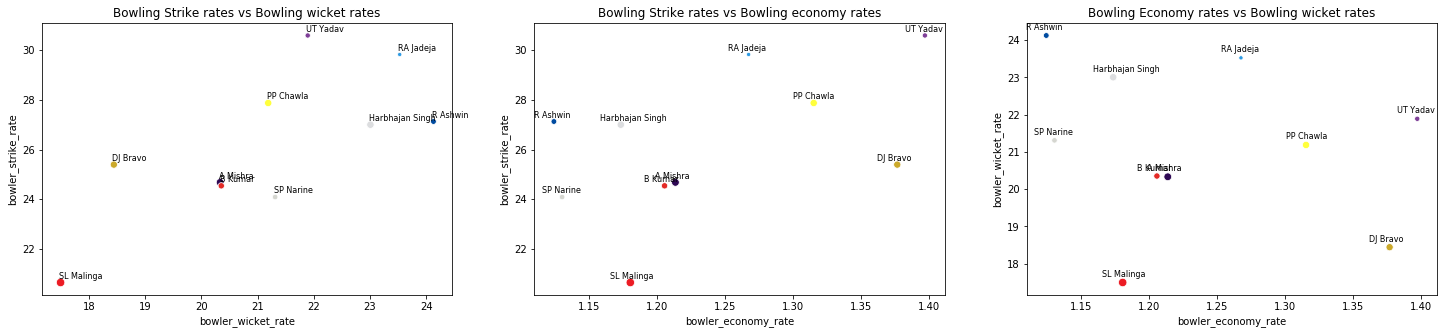

In [108]:
plt.figure(figsize=(25,5))

gs_bowler_1 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_1[0, 0])
p_bowler_1 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
    p_bowler_1.text(df_top_bowler_comparison.bowler_wicket_rate[line]-0.025,df_top_bowler_comparison.bowler_strike_rate[line]+0.15,df_top_bowler_comparison.bowler[line], fontsize=8)

p_bowler_1.set_title('Bowling Strike rates vs Bowling wicket rates')


plt.subplot(gs_bowler_1[0, 1])
p_bowler_2 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison,\
                     legend=False
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
    p_bowler_2.text(df_top_bowler_comparison.bowler_economy_rate[line]-0.015,df_top_bowler_comparison.bowler_strike_rate[line]+0.15,df_top_bowler_comparison.bowler[line], fontsize=8)

p_bowler_2.set_title('Bowling Strike rates vs Bowling economy rates')

plt.subplot(gs_bowler_1[0, 2])
p_bowler_3 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                     hue='bowler', hue_order=top_bowler_list,size='wickets',\
                     data=df_top_bowler_comparison, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison.shape[0]):
    p_bowler_3.text(df_top_bowler_comparison.bowler_economy_rate[line]-0.015,df_top_bowler_comparison.bowler_wicket_rate[line]+0.15,df_top_bowler_comparison.bowler[line], fontsize=8)

p_bowler_3.set_title('Bowling Economy rates vs Bowling wicket rates');

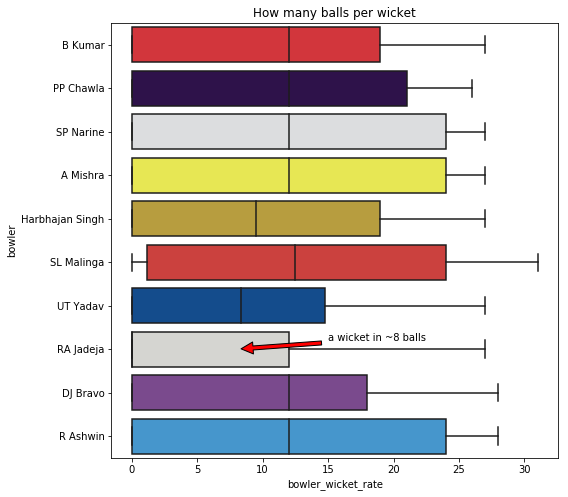

In [109]:
plt.figure(figsize=(8,8))
s_wickets = sns.boxplot(data=df_best_bowler,x='bowler_wicket_rate',y='bowler').set_title('How many balls per wicket');
plt.annotate('a wicket in ~8 balls', color="black", fontsize=10, xy=(8, 7.0), xytext=(15, 6.8),arrowprops=dict(facecolor='red', shrink=0.05));

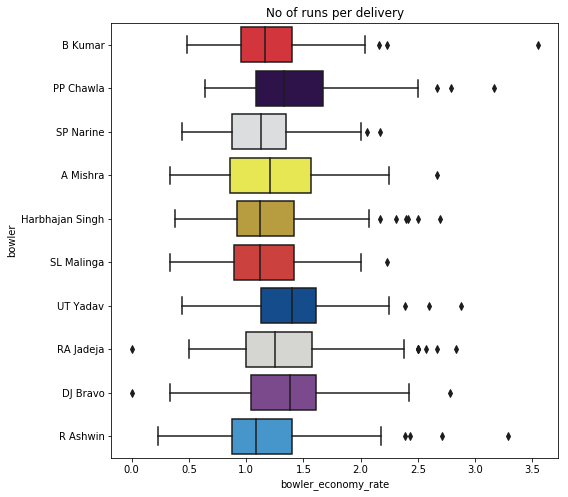

In [110]:
plt.figure(figsize=(8,8))
s_wickets = sns.boxplot(data=df_best_bowler,x='bowler_economy_rate',y='bowler').set_title('No of runs per delivery');

In [111]:
df_best_bowler['bowler_boundary_rate'] = df_best_bowler.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_best_bowler['bowler_farming_rate'] = df_best_bowler.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_best_bowler['bowler_dot_rate'] = df_best_bowler.apply(lambda row: calc_bowling_dot_rate(row),axis=1)
df_best_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1334
Data columns (total 43 columns):
match_id                                  1335 non-null int64
season                                    1335 non-null int64
bowler                                    1335 non-null object
balls_bowled                              1335 non-null int64
batsman_runs_conceded                     1335 non-null int64
total_runs_conceded                       1335 non-null int64
extras conceded                           1335 non-null int64
extras_wides                              1335 non-null int64
extras_noballs                            1335 non-null int64
extras_byes                               1335 non-null int64
extras_legbyes                            1335 non-null int64
wickets_incl_run_outs                     1335 non-null int64
wicket_type                               1335 non-null int64
dot_balls_bowled                          1335 non-null int64
1_run_balls_bowled      

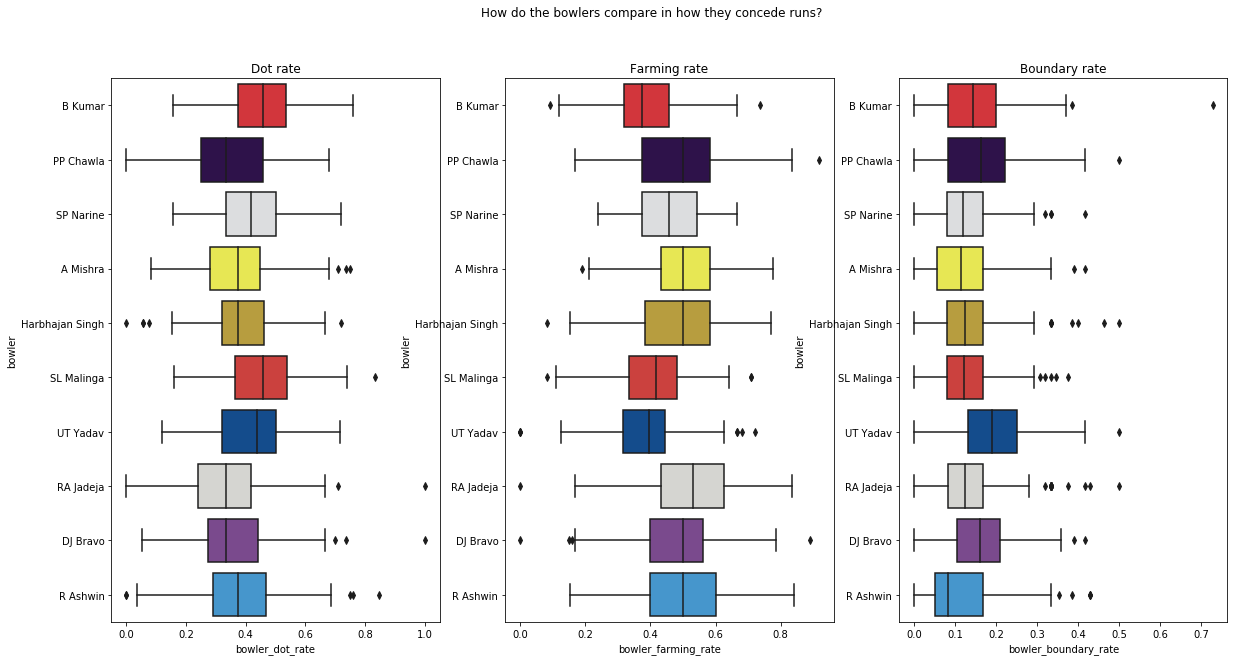

In [112]:
# How do bowlers compare in how they concede runs
grid_height = 1
grid_width = 3

fig_b = plt.figure(figsize=(20,10))
gs_b = gridspec.GridSpec(grid_height, grid_width)


plt.subplot(gs_b[0, 0])
sns.boxplot(data=df_best_bowler,x='bowler_dot_rate',y='bowler').set_title('Dot rate');

plt.subplot(gs_b[0, 1])
sns.boxplot(data=df_best_bowler,x='bowler_farming_rate',y='bowler').set_title('Farming rate');

plt.subplot(gs_b[0, 2])
sns.boxplot(data=df_best_bowler,x='bowler_boundary_rate',y='bowler').set_title('Boundary rate');

fig_b.suptitle('How do the bowlers compare in how they concede runs?');


Malinga is the top wicket taker - However, has he always been consistent?

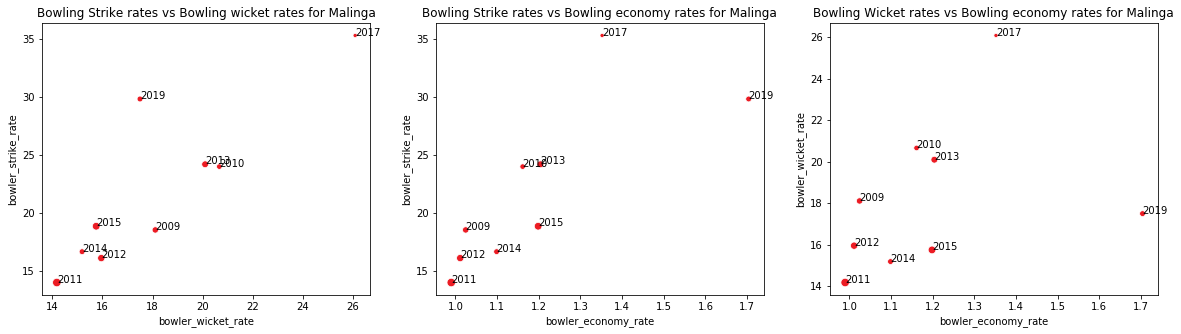

In [113]:
df_malinga_seasonal_stats = df_bowler_seasonal_stats.query('bowler=="SL Malinga"').reset_index()

fig_c = plt.figure(figsize=(20,5))
gs_c = gridspec.GridSpec(1, 3)


plt.subplot(gs_c[0, 0])
p_malinga_1 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                      size='wickets',\
                     data=df_malinga_seasonal_stats, legend=False\
                     
                    )
for line in range(0,df_malinga_seasonal_stats.shape[0]):
    p_malinga_1.text(df_malinga_seasonal_stats.bowler_wicket_rate[line],df_malinga_seasonal_stats.bowler_strike_rate[line],df_malinga_seasonal_stats.season[line])

p_malinga_1.set_title('Bowling Strike rates vs Bowling wicket rates for Malinga')



plt.subplot(gs_c[0, 1])
p_malinga_2 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                      size='wickets',\
                     data=df_malinga_seasonal_stats, legend=False\
                     
                    )
for line in range(0,df_malinga_seasonal_stats.shape[0]):
    p_malinga_2.text(df_malinga_seasonal_stats.bowler_economy_rate[line],df_malinga_seasonal_stats.bowler_strike_rate[line],df_malinga_seasonal_stats.season[line])

p_malinga_2.set_title('Bowling Strike rates vs Bowling economy rates for Malinga')


plt.subplot(gs_c[0, 2])
p_malinga_3 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                      size='wickets',\
                     data=df_malinga_seasonal_stats, legend=False\
                     
                    )
for line in range(0,df_malinga_seasonal_stats.shape[0]):
    p_malinga_3.text(df_malinga_seasonal_stats.bowler_economy_rate[line],df_malinga_seasonal_stats.bowler_wicket_rate[line],df_malinga_seasonal_stats.season[line])

p_malinga_3.set_title('Bowling Wicket rates vs Bowling economy rates for Malinga')
plt.show(p_malinga_1)
plt.show(p_malinga_2)
plt.show(p_malinga_3)

In [114]:
df_malinga_seasonal_stats

,index,season,bowler,balls_bowled,wickets,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,...,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,187,2009,SL Malinga,326,18.0,334,281,27,4,6,...,0,0,0,3,1,7,2,1.024540,18.555556,18.111111
1,312,2010,SL Malinga,310,15.0,360,320,24,0,10,...,0,0,1,1,3,2,6,1.161290,24.000000,20.666667
2,447,2011,SL Malinga,397,28.0,393,353,19,3,3,...,0,1,0,2,7,3,3,0.989924,14.035714,14.178571
3,575,2012,SL Malinga,351,22.0,355,331,18,1,0,...,0,0,1,2,5,2,4,1.011396,16.136364,15.954545
4,711,2013,SL Malinga,402,20.0,484,453,12,3,1,...,0,0,0,1,5,7,4,1.203980,24.200000,20.100000
5,811,2014,SL Malinga,243,16.0,267,244,8,1,0,...,0,0,1,0,4,4,1,1.098765,16.687500,15.187500
6,911,2015,SL Malinga,378,24.0,453,425,15,4,2,...,0,0,1,1,5,7,1,1.198413,18.875000,15.750000
7,1120,2017,SL Malinga,287,11.0,388,359,20,2,0,...,0,0,0,0,3,5,4,1.351916,35.272727,26.090909
8,1326,2019,SL Malinga,280,16.0,477,452,9,2,6,...,0,0,2,2,0,2,6,1.703571,29.812500,17.500000


Who have performed the best bowling over the 2017 to 2019 seasons

In [115]:
top_bowlers_last_3_years = df_bowler.query('season == 2017 | season == 2018 |season == 2019').groupby(['bowler'],as_index=False)['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']\
.agg('sum')\
.sort_values(by=['wickets'],ascending=False).head(10)['bowler']

top_bowlers_last_3_years

62       JJ Bumrah
125    Rashid Khan
53     Imran Tahir
19         B Kumar
160       UT Yadav
61      JD Unadkat
166      YS Chahal
131         S Kaul
12          AJ Tye
47       HH Pandya
Name: bowler, dtype: object

In [116]:
df_top_bowler_comparison_last_3_years = df_bowler_seasonal_stats.query('season == 2017 | season == 2018 |season == 2019').groupby('bowler',as_index=False)['wickets','balls_bowled','total_runs_conceded','batsman_runs_conceded',\
                                                                                     'extras_wides','extras_noballs','extras_byes','extras_legbyes',\
                                                                                     'wicket_haul_6','wicket_haul_5','wicket_haul_4','wicket_haul_3',\
                                                                                     'wicket_haul_2','wicket_haul_1','wicket_haul_0',\
                                                                                     'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',\
                                                                                     '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
                                                                                     ].sum().query('bowler in @top_bowlers_last_3_years') 

df_top_bowler_comparison_last_3_years['bowler_economy_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_economy_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_strike_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_strike_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_wicket_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_balls_bowled_per_wicket(row),axis=1)

df_top_bowler_comparison_last_3_years['bowler_boundary_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_farming_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_top_bowler_comparison_last_3_years['bowler_dot_rate'] = df_top_bowler_comparison_last_3_years.apply(lambda row: calc_bowling_dot_rate(row),axis=1)


df_top_bowler_comparison_last_3_years = df_top_bowler_comparison_last_3_years.sort_values(by=['wickets','balls_bowled','total_runs_conceded',\
                                                                    'wicket_haul_6','wicket_haul_5','wicket_haul_4'],\
                                                                ascending=False).reset_index(drop=True)

df_top_bowler_comparison_last_3_years

,bowler,wickets,balls_bowled,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wicket_haul_6,...,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate,bowler_boundary_rate,bowler_farming_rate,bowler_dot_rate
0,JJ Bumrah,56.0,1087,1321,1249,19,15,10,28,0,...,7,110,2,31,1.215271,23.589286,19.410714,0.131555,0.479301,0.389144
1,Rashid Khan,55.0,1106,1257,1214,15,0,5,23,0,...,1,92,0,47,1.136528,22.854545,20.109091,0.125678,0.462929,0.411392
2,Imran Tahir,50.0,801,1024,997,11,1,8,7,0,...,0,64,0,48,1.278402,20.480000,16.020000,0.139825,0.506866,0.353308
3,B Kumar,48.0,977,1238,1181,30,4,4,19,0,...,4,114,1,41,1.267144,25.791667,20.354167,0.159672,0.406346,0.433982
4,UT Yadav,45.0,876,1270,1199,36,3,6,26,0,...,3,125,1,54,1.449772,28.222222,19.466667,0.205479,0.371005,0.423516
5,JD Unadkat,45.0,825,1246,1208,23,1,0,14,0,...,4,102,1,58,1.510303,27.688889,18.333333,0.195152,0.463030,0.341818
6,YS Chahal,44.0,893,1167,1089,36,5,21,16,0,...,2,64,1,56,1.306831,26.522727,20.295455,0.135498,0.481523,0.382979
7,S Kaul,43.0,792,1129,1094,16,4,4,11,0,...,0,97,0,42,1.425505,26.255814,18.418605,0.175505,0.508838,0.315657
8,AJ Tye,39.0,618,871,831,22,2,0,16,0,...,1,74,1,26,1.409385,22.333333,15.846154,0.163430,0.530744,0.305825
9,HH Pandya,38.0,701,1052,995,32,2,1,22,0,...,1,85,1,46,1.500713,27.684211,18.447368,0.188302,0.466476,0.343795


Bumrah, Rashid Khan, Imran Tahir and Bhuvaneshwar Kumar have had the best bowling figures

In [117]:
df_top_bowler_comparison_last_3_years[['bowler','wickets','balls_bowled','total_runs_conceded','bowler_strike_rate','bowler_wicket_rate']]

,bowler,wickets,balls_bowled,total_runs_conceded,bowler_strike_rate,bowler_wicket_rate
0,JJ Bumrah,56.0,1087,1321,23.589286,19.410714
1,Rashid Khan,55.0,1106,1257,22.854545,20.109091
2,Imran Tahir,50.0,801,1024,20.480000,16.020000
3,B Kumar,48.0,977,1238,25.791667,20.354167
4,UT Yadav,45.0,876,1270,28.222222,19.466667
5,JD Unadkat,45.0,825,1246,27.688889,18.333333
6,YS Chahal,44.0,893,1167,26.522727,20.295455
7,S Kaul,43.0,792,1129,26.255814,18.418605
8,AJ Tye,39.0,618,871,22.333333,15.846154
9,HH Pandya,38.0,701,1052,27.684211,18.447368


Lets plot the efficiency rates

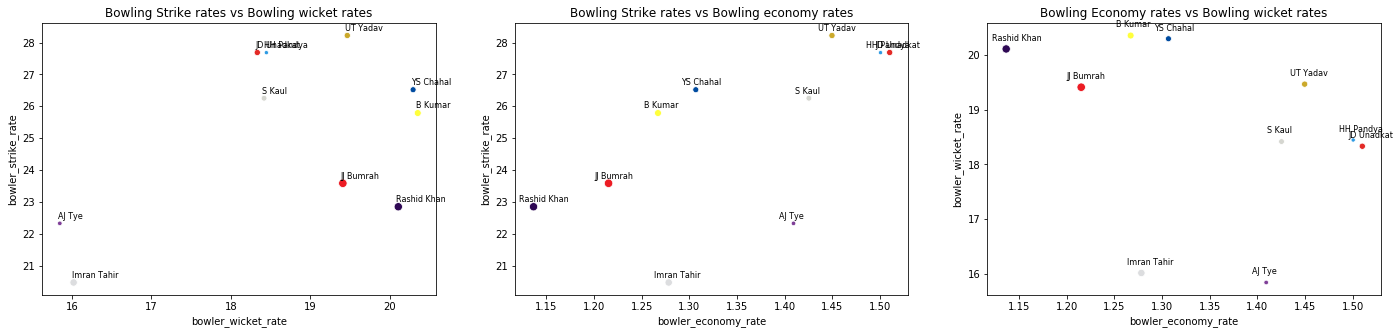

In [118]:
plt.figure(figsize=(24,5))

gs_bowler_3 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_3[0, 0])
p_bowler_11 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_last_3_years,size='wickets',\
                     data=df_top_bowler_comparison_last_3_years, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_last_3_years.shape[0]):
    p_bowler_11.text(df_top_bowler_comparison_last_3_years.bowler_wicket_rate[line]-0.025,df_top_bowler_comparison_last_3_years.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_last_3_years.bowler[line], fontsize=8)

p_bowler_11.set_title('Bowling Strike rates vs Bowling wicket rates')


plt.subplot(gs_bowler_3[0, 1])
p_bowler_21 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_last_3_years,size='wickets',\
                     data=df_top_bowler_comparison_last_3_years,\
                     legend=False
                    )
for line in range(0,df_top_bowler_comparison_last_3_years.shape[0]):
    p_bowler_21.text(df_top_bowler_comparison_last_3_years.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_last_3_years.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_last_3_years.bowler[line], fontsize=8)

p_bowler_21.set_title('Bowling Strike rates vs Bowling economy rates')

plt.subplot(gs_bowler_3[0, 2])
p_bowler_31 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                     hue='bowler', hue_order=top_bowlers_last_3_years,size='wickets',\
                     data=df_top_bowler_comparison_last_3_years, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_last_3_years.shape[0]):
    p_bowler_31.text(df_top_bowler_comparison_last_3_years.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_last_3_years.bowler_wicket_rate[line]+0.15,df_top_bowler_comparison_last_3_years.bowler[line], fontsize=8)

p_bowler_31.set_title('Bowling Economy rates vs Bowling wicket rates');

Now, lets look at only 2019 performances

In [119]:
top_bowlers_2019 = df_bowler.query('season == 2019').groupby(['bowler'],as_index=False)['balls_bowled', 'wickets','total_runs_conceded','batsman_runs_conceded', \
                      'extras conceded', 'extras_wides', 'extras_noballs', 'extras_byes','extras_legbyes',\
                      'wickets_incl_run_outs', 'wicket_type_caught', 'wicket_type_bowled','wicket_type_lbw', 'wicket_type_stumped',\
                      'wicket_type_run_out','wicket_type_hit_wicket', 'wicket_type_caught_and_bowled',\
                      'wicket_type_retired_hurt', 'wicket_type_obstructing_the_field_flag',\
                      'dot_balls_bowled', '1_run_balls_bowled','2_run_balls_bowled', '3_run_balls_bowled',\
                      '4_run_balls_bowled','5_run_balls_bowled', '6_run_balls_bowled', 'wicket_haul_6', \
                      'wicket_haul_5', 'wicket_haul_4','wicket_haul_3', 'wicket_haul_2', 'wicket_haul_1', 'wicket_haul_0']\
.agg('sum')\
.sort_values(by=['wickets'],ascending=False).head(10)['bowler']



df_top_bowler_comparison_2019 = df_bowler_seasonal_stats.query('season==2019').groupby('bowler',as_index=False)['wickets','balls_bowled','total_runs_conceded','batsman_runs_conceded',\
                                                                                     'extras_wides','extras_noballs','extras_byes','extras_legbyes',\
                                                                                     'wicket_haul_6','wicket_haul_5','wicket_haul_4','wicket_haul_3',\
                                                                                     'wicket_haul_2','wicket_haul_1','wicket_haul_0',\
                                                                                     'dot_balls_bowled','1_run_balls_bowled', '2_run_balls_bowled', '3_run_balls_bowled',\
                                                                                     '4_run_balls_bowled', '5_run_balls_bowled', '6_run_balls_bowled',\
                                                                                     ].sum().query('bowler in @top_bowlers_2019') 

df_top_bowler_comparison_2019['bowler_economy_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_economy_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_strike_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_strike_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_wicket_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_balls_bowled_per_wicket(row),axis=1)

df_top_bowler_comparison_2019['bowler_boundary_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_boundary_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_farming_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_farming_rate(row),axis=1)
df_top_bowler_comparison_2019['bowler_dot_rate'] = df_top_bowler_comparison_2019.apply(lambda row: calc_bowling_dot_rate(row),axis=1)


df_top_bowler_comparison_2019 = df_top_bowler_comparison_2019.sort_values(by=['wickets','balls_bowled','total_runs_conceded',\
                                                                    'wicket_haul_6','wicket_haul_5','wicket_haul_4'],\
                                                                ascending=False).reset_index(drop=True)

df_top_bowler_comparison_2019

,bowler,wickets,balls_bowled,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,wicket_haul_6,...,3_run_balls_bowled,4_run_balls_bowled,5_run_balls_bowled,6_run_balls_bowled,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate,bowler_boundary_rate,bowler_farming_rate,bowler_dot_rate
0,Imran Tahir,26.0,389,454,440,5,0,4,5,0,...,0,30,0,18,1.167095,17.461538,14.961538,0.123393,0.498715,0.377892
1,K Rabada,25.0,297,401,382,12,0,3,4,0,...,0,40,0,10,1.350168,16.040000,11.880000,0.168350,0.468013,0.363636
2,DL Chahar,22.0,403,503,486,10,3,0,4,0,...,3,59,2,12,1.248139,22.863636,18.318182,0.181141,0.349876,0.468983
3,S Gopal,20.0,289,354,350,0,1,1,2,0,...,0,20,1,17,1.224913,17.700000,14.450000,0.131488,0.508651,0.359862
4,JJ Bumrah,19.0,381,459,433,5,4,5,12,0,...,2,41,1,11,1.204724,24.157895,20.052632,0.139108,0.451444,0.409449
5,Mohammed Shami,19.0,331,493,477,7,1,3,5,0,...,0,47,0,19,1.489426,25.947368,17.421053,0.199396,0.465257,0.335347
6,K Ahmed,19.0,222,310,292,13,0,2,3,0,...,1,29,0,11,1.396396,16.315789,11.684211,0.180180,0.445946,0.373874
7,YS Chahal,18.0,308,414,394,12,0,5,3,0,...,0,22,0,22,1.344156,23.000000,17.111111,0.142857,0.490260,0.366883
8,Rashid Khan,17.0,367,412,396,6,0,4,6,0,...,1,32,0,15,1.122616,24.235294,21.588235,0.128065,0.435967,0.435967
9,Harbhajan Singh,16.0,269,325,315,7,0,0,3,0,...,2,21,0,15,1.208178,20.312500,16.812500,0.133829,0.442379,0.423792


We now have Rabada and Chahar making it into the top 3. Malinga is back in top 10 at #10

In [120]:
df_top_bowler_comparison_2019[['bowler','wickets','balls_bowled','total_runs_conceded','bowler_strike_rate','bowler_wicket_rate']]

,bowler,wickets,balls_bowled,total_runs_conceded,bowler_strike_rate,bowler_wicket_rate
0,Imran Tahir,26.0,389,454,17.461538,14.961538
1,K Rabada,25.0,297,401,16.040000,11.880000
2,DL Chahar,22.0,403,503,22.863636,18.318182
3,S Gopal,20.0,289,354,17.700000,14.450000
4,JJ Bumrah,19.0,381,459,24.157895,20.052632
5,Mohammed Shami,19.0,331,493,25.947368,17.421053
6,K Ahmed,19.0,222,310,16.315789,11.684211
7,YS Chahal,18.0,308,414,23.000000,17.111111
8,Rashid Khan,17.0,367,412,24.235294,21.588235
9,Harbhajan Singh,16.0,269,325,20.312500,16.812500


In [121]:
df_bowler_seasonal_stats.query('season==2019').head()

,season,bowler,balls_bowled,wickets,total_runs_conceded,batsman_runs_conceded,extras_wides,extras_noballs,extras_byes,extras_legbyes,...,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
1237,2019,A Joseph,55,6.0,94,89,3,0,1,1,...,1,0,0,0,0,0,2,1.709091,15.666667,9.166667
1238,2019,A Mishra,243,10.0,274,271,2,0,0,1,...,0,0,0,1,1,5,4,1.127572,27.400000,24.300000
1239,2019,A Roy,15,1.0,14,11,3,0,0,0,...,0,0,0,0,0,1,0,0.933333,14.000000,15.000000
1240,2019,A Singh,65,3.0,130,117,5,0,4,4,...,0,0,0,0,1,1,1,2.000000,43.333333,21.666667
1241,2019,AD Russell,182,11.0,290,288,1,0,0,1,...,0,0,0,0,3,5,4,1.593407,26.363636,16.545455


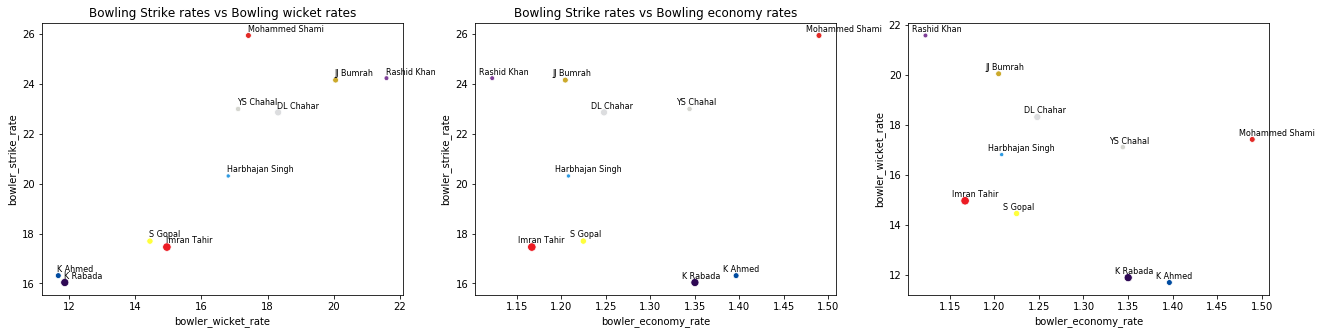

In [122]:
plt.figure(figsize=(22,5))

gs_bowler_3 = gridspec.GridSpec(1, 3)


plt.subplot(gs_bowler_3[0, 0])
p_bowler_12 = sns.scatterplot(x="bowler_wicket_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_2019,size='wickets',\
                     data=df_top_bowler_comparison_2019, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_2019.shape[0]):
    p_bowler_12.text(df_top_bowler_comparison_2019.bowler_wicket_rate[line]-0.025,df_top_bowler_comparison_2019.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_2019.bowler[line], fontsize=8)

p_bowler_12.set_title('Bowling Strike rates vs Bowling wicket rates')


plt.subplot(gs_bowler_3[0, 1])
p_bowler_22 = sns.scatterplot(x="bowler_economy_rate", y="bowler_strike_rate",\
                     hue='bowler', hue_order=top_bowlers_2019,size='wickets',\
                     data=df_top_bowler_comparison_2019,\
                     legend=False
                    )
for line in range(0,df_top_bowler_comparison_2019.shape[0]):
    p_bowler_22.text(df_top_bowler_comparison_2019.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_2019.bowler_strike_rate[line]+0.15,df_top_bowler_comparison_2019.bowler[line], fontsize=8)

p_bowler_22.set_title('Bowling Strike rates vs Bowling economy rates')

plt.subplot(gs_bowler_3[0, 2])
p_bowler_32 = sns.scatterplot(x="bowler_economy_rate", y="bowler_wicket_rate",\
                     hue='bowler', hue_order=top_bowlers_2019,size='wickets',\
                     data=df_top_bowler_comparison_2019, legend=False\
                     
                    )
for line in range(0,df_top_bowler_comparison_2019.shape[0]):
    p_bowler_32.text(df_top_bowler_comparison_2019.bowler_economy_rate[line]-0.015,df_top_bowler_comparison_2019.bowler_wicket_rate[line]+0.15,df_top_bowler_comparison_2019.bowler[line], fontsize=8)

p_bowler_31.set_title('Bowling Economy rates vs Bowling wicket rates');

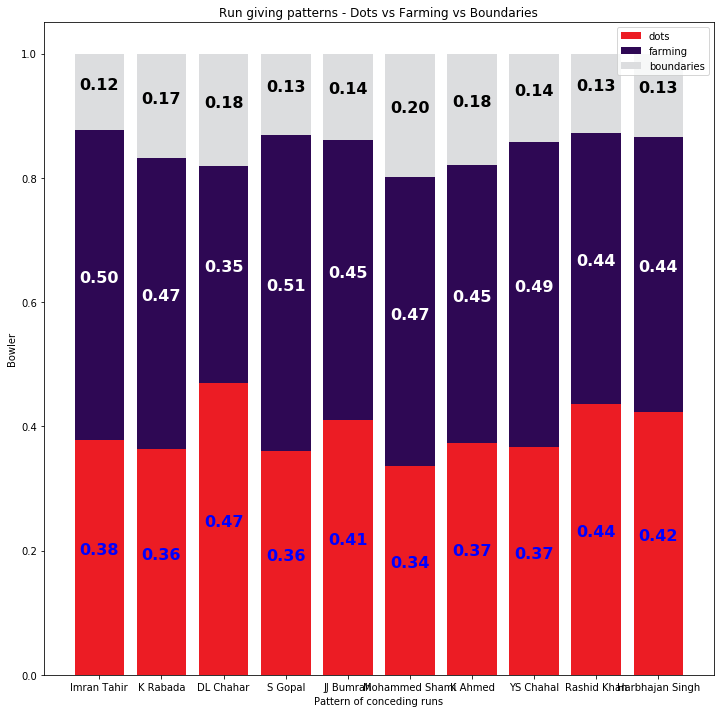

In [123]:
plt.figure(figsize=(12,12))

p_bowler_2019_dot = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_farming = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_farming_rate'],\
                                 bottom=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_boundary = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_boundary_rate'],\
                                  bottom=df_top_bowler_comparison_2019['bowler_dot_rate']+df_top_bowler_comparison_2019['bowler_farming_rate'])


for r1, r2, r3 in zip(p_bowler_2019_dot, p_bowler_2019_farming, p_bowler_2019_boundary):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % h1,ha="center", va="bottom", color="blue", fontsize=16, fontweight="bold")
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % h2,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % h3,ha="center", va="bottom", color="black", fontsize=16, fontweight="bold")
        
    

plt.ylabel('Bowler')
plt.xlabel('Pattern of conceding runs')
plt.title('Run giving patterns - Dots vs Farming vs Boundaries')

plt.legend((p_bowler_2019_dot,p_bowler_2019_farming,p_bowler_2019_boundary),('dots','farming','boundaries'),loc='best')

plt.show()

Half of Chahar's deliveries dont yield a run

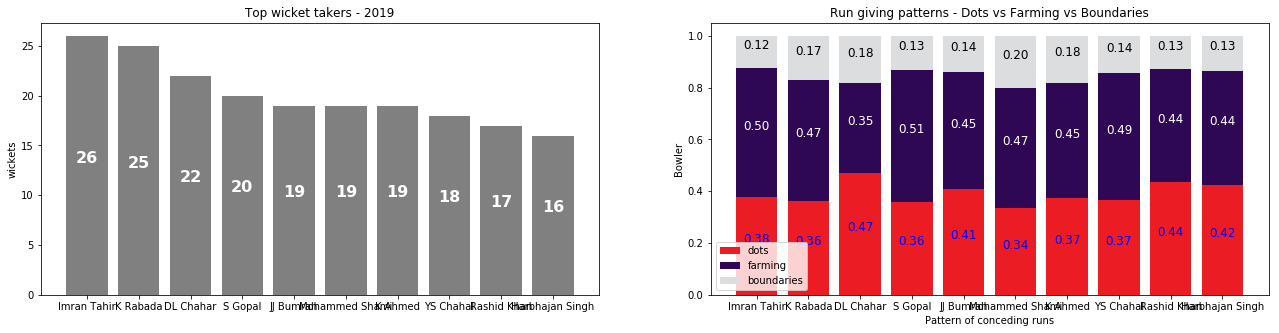

In [124]:
plt.figure(figsize=(22,5))

gs_bowler_4 = gridspec.GridSpec(1, 2)


plt.subplot(gs_bowler_4[0, 0])


p_bowler_2019_dot = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['wickets'],color='grey')

plt.title('Top wicket takers - 2019')
plt.ylabel('wickets')
for r1 in p_bowler_2019_dot:
    w1 = r1.get_width()
    h1 = r1.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.0f" % h1,ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
        
plt.subplot(gs_bowler_4[0, 1])    

p_bowler_2019_dot = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_farming = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_farming_rate'],\
                                 bottom=df_top_bowler_comparison_2019['bowler_dot_rate'])
p_bowler_2019_boundary = plt.bar(x=df_top_bowler_comparison_2019['bowler'],height=df_top_bowler_comparison_2019['bowler_boundary_rate'],\
                                  bottom=df_top_bowler_comparison_2019['bowler_dot_rate']+df_top_bowler_comparison_2019['bowler_farming_rate'])


for r1, r2, r3 in zip(p_bowler_2019_dot, p_bowler_2019_farming, p_bowler_2019_boundary):
    w1 = r1.get_width()
    w2 = r2.get_width()
    w3 = r3.get_width()
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x()+w1/2.,r1.get_y()+h1/2.,"%.2f" % h1,ha="center", va="bottom", color="blue", fontsize=12)
    plt.text(r2.get_x()+w2/2.,r2.get_y()+h2/2.,"%.2f" % h2,ha="center", va="bottom", color="white", fontsize=12)
    plt.text(r3.get_x()+w3/2.,r3.get_y()+h3/2.,"%.2f" % h3,ha="center", va="bottom", color="black", fontsize=12)
        
    

plt.ylabel('Bowler')
plt.xlabel('Pattern of conceding runs')
plt.title('Run giving patterns - Dots vs Farming vs Boundaries')

plt.legend((p_bowler_2019_dot,p_bowler_2019_farming,p_bowler_2019_boundary),('dots','farming','boundaries'),loc='best')

plt.show()

In [125]:
df_bowler.head()

,match_id,season,bowler,balls_bowled,batsman_runs_conceded,total_runs_conceded,extras conceded,extras_wides,extras_noballs,extras_byes,...,wicket_haul_6,wicket_haul_5,wicket_haul_4,wicket_haul_3,wicket_haul_2,wicket_haul_1,wicket_haul_0,bowler_economy_rate,bowler_strike_rate,bowler_wicket_rate
0,1,2017,A Choudhary,28,51,55,4,3,1,0,...,0,0,0,0,0,1,0,1.964286,55.0,28.0
1,1,2017,A Nehra,25,41,42,1,1,0,0,...,0,0,0,0,1,0,0,1.680000,21.0,12.5
2,1,2017,B Kumar,25,26,28,2,1,0,0,...,0,0,0,0,1,0,0,1.120000,14.0,12.5
3,1,2017,BCJ Cutting,24,33,35,2,2,0,0,...,0,0,0,0,0,0,1,1.458333,0.0,0.0
4,1,2017,Bipul Sharma,6,4,4,0,0,0,0,...,0,0,0,0,0,1,0,0.666667,4.0,6.0


# fielder performance

In [126]:
df_combined['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [127]:
df_combined.query('dismissal_kind == "caught"').head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season_ipl_summary
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
165,1,2,RCB,SRH,7,3,CH Gayle,TM Head,DJ Hooda,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
206,1,2,RCB,SRH,13,5,TM Head,SR Watson,Rashid Khan,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0


In [128]:
df_combined.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season_ipl_summary
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0.0,RPS,0.0,7.0,SPD Smith,"MCAS, Pune",A Nand Kishore,S Ravi,NaN,2017.0


In [129]:
fielder_cols = ['match_id','date','season','batsman','non_striker','player_dismissed','bowler',\
                'fielder',\
                'caught_flag','lbw_flag','bowled_flag','stumped_flag','run_out_flag','hit_wicket_flag',\
                'caught_and_bowled_flag','retired_hurt_flag','obstructing_the_field_flag']


df_fielders = df_combined[fielder_cols]
df_fielders.dropna(how='any',subset=['player_dismissed'],axis=0,inplace=True)
df_fielders.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,match_id,date,season,batsman,non_striker,player_dismissed,bowler,fielder,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
11,1,2017-05-04,2017,DA Warner,S Dhawan,DA Warner,A Choudhary,Mandeep Singh,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,1,2017-05-04,2017,S Dhawan,MC Henriques,S Dhawan,STR Binny,Sachin Baby,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,1,2017-05-04,2017,MC Henriques,Yuvraj Singh,MC Henriques,YS Chahal,Sachin Baby,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,1,2017-05-04,2017,Yuvraj Singh,DJ Hooda,Yuvraj Singh,TS Mills,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
160,1,2017-05-04,2017,Mandeep Singh,CH Gayle,Mandeep Singh,Rashid Khan,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df_fielders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8834 entries, 11 to 179077
Data columns (total 17 columns):
match_id                      8834 non-null int64
date                          8834 non-null datetime64[ns]
season                        8834 non-null int64
batsman                       8834 non-null object
non_striker                   8834 non-null object
player_dismissed              8834 non-null object
bowler                        8834 non-null object
fielder                       6448 non-null object
caught_flag                   5348 non-null float64
lbw_flag                      540 non-null float64
bowled_flag                   1581 non-null float64
stumped_flag                  278 non-null float64
run_out_flag                  852 non-null float64
hit_wicket_flag               10 non-null float64
caught_and_bowled_flag        211 non-null float64
retired_hurt_flag             12 non-null float64
obstructing_the_field_flag    2 non-null float64
dtypes: datetime64[

In [131]:
df_fielders.head()

,match_id,date,season,batsman,non_striker,player_dismissed,bowler,fielder,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
11,1,2017-05-04,2017,DA Warner,S Dhawan,DA Warner,A Choudhary,Mandeep Singh,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,1,2017-05-04,2017,S Dhawan,MC Henriques,S Dhawan,STR Binny,Sachin Baby,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,1,2017-05-04,2017,MC Henriques,Yuvraj Singh,MC Henriques,YS Chahal,Sachin Baby,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,1,2017-05-04,2017,Yuvraj Singh,DJ Hooda,Yuvraj Singh,TS Mills,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
160,1,2017-05-04,2017,Mandeep Singh,CH Gayle,Mandeep Singh,Rashid Khan,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df_wicket_details = pd.melt(df_fielders,\
                            id_vars=['match_id','date','season','batsman','non_striker','player_dismissed','bowler','fielder'],\
                            var_name='wicket_type', \
                            value_name='wicket')
df_wicket_details.dropna(how='any',subset=['wicket'],axis=0,inplace=True)
df_wicket_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8834 entries, 0 to 79477
Data columns (total 10 columns):
match_id            8834 non-null int64
date                8834 non-null datetime64[ns]
season              8834 non-null int64
batsman             8834 non-null object
non_striker         8834 non-null object
player_dismissed    8834 non-null object
bowler              8834 non-null object
fielder             6448 non-null object
wicket_type         8834 non-null object
wicket              8834 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 759.2+ KB


In [133]:
df_wicket_details.head()

,match_id,date,season,batsman,non_striker,player_dismissed,bowler,fielder,wicket_type,wicket
0,1,2017-05-04,2017,DA Warner,S Dhawan,DA Warner,A Choudhary,Mandeep Singh,caught_flag,1.0
1,1,2017-05-04,2017,S Dhawan,MC Henriques,S Dhawan,STR Binny,Sachin Baby,caught_flag,1.0
2,1,2017-05-04,2017,MC Henriques,Yuvraj Singh,MC Henriques,YS Chahal,Sachin Baby,caught_flag,1.0
5,1,2017-05-04,2017,CH Gayle,TM Head,CH Gayle,DJ Hooda,DA Warner,caught_flag,1.0
7,1,2017-05-04,2017,TM Head,SR Watson,TM Head,Rashid Khan,Yuvraj Singh,caught_flag,1.0


In [134]:
df_wicket_details[df_wicket_details.fielder.notnull() & df_wicket_details.wicket_type == 'run_out_flag']

D:\anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,match_id,date,season,batsman,non_striker,player_dismissed,bowler,fielder,wicket_type,wicket


In [135]:
df_stumping_dismissals = df_wicket_details.query('wicket_type=="stumped_flag"')
df_run_out_dismissals = df_wicket_details.query('wicket_type=="run_out_flag"')
df_catch_dismissals = df_wicket_details.query('wicket_type=="caught_flag" | wicket_type=="caught_and_bowled_flag" ')
df_bowled_dismissals = df_wicket_details.query('wicket_type=="bowled_flag"')
df_lbw_dismissals = df_wicket_details.query('wicket_type=="lbw_flag"')
df_other_modes_of_dismissals = df_wicket_details.query('wicket_type=="hit_wicket_flag" | wicket_type=="retired_hurt_flag" | wicket_type=="obstructing_the_field_flag"')


Who crashes the stumps most often?

In [136]:
df_bowled_dismissals.groupby(['bowler'],as_index=False)['wicket'].sum().sort_values(by=['wicket','bowler'],ascending=False).head(10)

,bowler,wicket
212,SL Malinga,63.0
166,PP Chawla,43.0
215,SP Narine,35.0
33,B Kumar,35.0
75,Harbhajan Singh,29.0
180,RA Jadeja,27.0
65,DW Steyn,26.0
185,RP Singh,25.0
3,A Mishra,25.0
5,A Nehra,23.0


Who's got the most wickets through catches?

In [137]:
df_catch_dismissals.groupby(['bowler'],as_index=False)['wicket'].sum().sort_values(by=['wicket'],ascending=False).head(10)

,bowler,wicket
78,DJ Bravo,121.0
283,SL Malinga,96.0
106,Harbhajan Singh,94.0
6,A Mishra,92.0
44,B Kumar,89.0
318,UT Yadav,89.0
236,R Vinay Kumar,86.0
225,R Ashwin,81.0
8,A Nehra,78.0
220,PP Chawla,76.0


Who's got the most catches in the field?

In [138]:
df_catch_dismissals.groupby(['fielder'],as_index=False)['wicket'].sum().sort_values(by=['wicket'],ascending=False).head(10)

,fielder,wicket
205,KD Karthik,109.0
407,SK Raina,99.0
276,MS Dhoni,98.0
18,AB de Villiers,93.0
367,RV Uthappa,84.0
350,RG Sharma,82.0
199,KA Pollard,76.0
464,V Kohli,73.0
309,PA Patel,69.0
374,S Dhawan,68.0


Which player got dismissed by run-out the most?

In [139]:
df_run_out_dismissals.groupby(['player_dismissed'],as_index=False)['wicket'].sum().sort_values(by=['wicket'],ascending=False).head(10)

,player_dismissed,wicket
79,G Gambhir,16.0
219,S Dhawan,14.0
238,SK Raina,13.0
28,AT Rayudu,13.0
146,M Vijay,12.0
289,YK Pathan,11.0
288,Y Venugopal Rao,11.0
121,KD Karthik,11.0
3,A Mishra,10.0
184,PA Patel,10.0


Who's got the most stumpings?

In [140]:
df_stumping_dismissals.groupby(['fielder'],as_index=False)['wicket'].sum().sort_values(by=['wicket'],ascending=False).head(10)

,fielder,wicket
21,MS Dhoni,38.0
29,RV Uthappa,32.0
14,KD Karthik,29.0
33,WP Saha,18.0
25,PA Patel,16.0
1,AC Gilchrist,16.0
24,NV Ojha,10.0
13,KC Sangakkara,9.0
28,RR Pant,9.0
27,Q de Kock,8.0


Lets now try to analyze the team's inning to see the progression of the inning

In [141]:
df_inning_wise = deliveries[['match_id','inning','inning_quarter',\
                             'player_dismissed','batsman_runs','total_runs','6_flag','4_flag',\
                             'dot_ball_flag','ball','wide_runs','noball_runs']].groupby(['match_id',\
                                                                             'inning',\
                                                                             'inning_quarter'],as_index=False)['batsman_runs','total_runs','player_dismissed','ball',\
                                                                                                               'wide_runs','noball_runs','6_flag',\
                                                                                                               '4_flag','dot_ball_flag'].agg({'batsman_runs':'sum','total_runs':'sum',\
                                                                                                               'player_dismissed':'count','ball':'count',\
                                                                                                               'wide_runs':'sum','noball_runs':'sum',\
                                                                                                               '6_flag':'count','4_flag':'count',\
                                                                                                               'dot_ball_flag':'count'})



In [142]:
df_inning_wise.head(8)

,match_id,inning,inning_quarter,batsman_runs,total_runs,player_dismissed,ball,wide_runs,noball_runs,6_flag,4_flag,dot_ball_flag
0,1,1,Q1,38,42,1,32,2,1,1,4,14
1,1,1,Q2,46,46,0,30,0,0,1,4,4
2,1,1,Q3,62,63,1,31,1,0,3,6,5
3,1,1,Q4,54,56,2,32,2,0,4,3,9
4,1,2,Q1,46,48,0,32,2,0,2,6,16
5,1,2,Q2,48,50,2,32,1,1,2,5,11
6,1,2,Q3,40,41,3,31,1,0,1,3,7
7,1,2,Q4,32,33,5,28,0,0,3,1,15


For the match_id 1 the first inning had scores of 42, 46, 63 and 56 (total of 207 for 4 wickets) and the second inning had scores of 48, 50, 41, 33 (total of 172 for 10 wickets)

In [143]:
matches.query('id==1')[['winner','toss_winner','toss_decision','win_by_runs','win_by_wickets','player_of_match']]

,winner,toss_winner,toss_decision,win_by_runs,win_by_wickets,player_of_match
0,SRH,RCB,field,35,0,Yuvraj Singh


In [144]:
df_batsman.query('match_id==1').sort_values(by='runs_scored',ascending=False).head(5)

,match_id,season,date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,...,player_dismissed,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
247,1,2017,2017-05-04,Yuvraj Singh,62,30,7,3,7,30.0,...,Yuvraj Singh,1.0,SRH,0,0,1,0,0.333333,0.433333,0.233333
233,1,2017,2017-05-04,Yuvraj Singh,62,30,7,3,7,30.0,...,Yuvraj Singh,1.0,SRH,0,0,1,0,0.333333,0.433333,0.233333
245,1,2017,2017-05-04,Yuvraj Singh,62,30,7,3,7,30.0,...,Yuvraj Singh,1.0,SRH,0,0,1,0,0.333333,0.433333,0.233333
244,1,2017,2017-05-04,Yuvraj Singh,62,30,7,3,7,30.0,...,Yuvraj Singh,1.0,SRH,0,0,1,0,0.333333,0.433333,0.233333
243,1,2017,2017-05-04,Yuvraj Singh,62,30,7,3,7,30.0,...,Yuvraj Singh,1.0,SRH,0,0,1,0,0.333333,0.433333,0.233333


Yes, RCB won the toss and decided to field.

SRH amassed a massive 207 for 4 on the back of a superlative batting performance by Yuvraj Singh of 62 off 30 deliveries

SRH won the match by 35 runs

In [145]:
# Create a df_match_outcomes DataFrame to create a preediction model
df_match_outcomes =matches[['id','toss_winner','toss_decision','result','winner','win_by_runs','win_by_wickets','team1','team2']]
df_match_outcomes.head()

,id,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,team1,team2
0,1,RCB,field,normal,SRH,35,0,SRH,RCB
1,2,RPS,field,normal,RPS,0,7,MI,RPS
2,3,KKR,field,normal,KKR,0,10,GL,KKR
3,4,KXP,field,normal,KXP,0,6,RPS,KXP
4,5,RCB,bat,normal,RCB,15,0,RCB,DD


In [146]:
df_match_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 9 columns):
id                756 non-null int64
toss_winner       756 non-null object
toss_decision     756 non-null object
result            756 non-null object
winner            756 non-null object
win_by_runs       756 non-null int64
win_by_wickets    756 non-null int64
team1             756 non-null object
team2             756 non-null object
dtypes: int64(3), object(6)
memory usage: 53.2+ KB


In [147]:
def determine_team_batting_first(row):
    '''
    This function determines which of the 2 teams batted first 
    INPUT: row of a DataFrame
    OUTPUT: The team that batted first
    '''
    if row['toss_decision'] == 'bat':
        value = row['toss_winner']
    elif (row['toss_decision'] == 'field') & (row['team1'] == row['toss_winner']):
        value = row['team2']
    else:
        value = row['team1']
    return value

def determine_team_batting_second(row):
    '''
    This function determines which of the 2 teams batted second 
    INPUT: row of a DataFrame
    OUTPUT: The team that batted second
    '''
    if row['toss_decision'] == 'field':
        value = row['toss_winner']
    elif (row['toss_decision'] == 'bat') & (row['team1']==row['toss_winner']):
        value = row['team2']
    else:
        value = row['team1']
    return value

def determine_winner(row):
    '''
    This function determines which of the 2 teams won the match 
    INPUT: row of a DataFrame
    OUTPUT: The team that won the match
    '''

    if row['batting_team'] == row['winner']:
        value = 1
    else:
        value = 0
    return value



def check_if_winner_of_toss_won_the_match(row):
    '''
    This function determines is the team that won the toss also won 
    INPUT: row of a DataFrame
    OUTPUT: 1 if the team that won the toss also won
    '''
    if row['toss_winner'] == row['winner']:
        value = 1
    else:
        value = 0
    return value

In [148]:
# Determine the team that batted first and second
    
df_match_outcomes[1] = df_match_outcomes.apply(lambda row: determine_team_batting_first(row),axis=1)
df_match_outcomes[2] = df_match_outcomes.apply(lambda row: determine_team_batting_second(row),axis=1)
#df_match_outcomes.drop(columns=['team1','team2'],axis=1,inplace=True)
df_match_outcomes.head()

# Create 
df_match_inning = pd.melt(df_match_outcomes,\
        id_vars=['id','toss_winner','toss_decision','result',\
                 'winner','win_by_runs','win_by_wickets'],\
        value_vars=[1,2]).sort_values(\
                                                                             by=['id','variable'])

df_match_inning.rename(columns={'variable':'inning','value':'batting_team'},inplace=True)

df_match_inning['winning_inning'] = df_match_inning.apply(lambda row: determine_winner(row),axis=1)
df_match_inning['win_vs_toss'] = df_match_inning.apply(lambda row: check_if_winner_of_toss_won_the_match(row),axis=1)

df_match_inning.head(10)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,inning,batting_team,winning_inning,win_vs_toss
0,1,RCB,field,normal,SRH,35,0,1,SRH,1,0
756,1,RCB,field,normal,SRH,35,0,2,RCB,0,0
1,2,RPS,field,normal,RPS,0,7,1,MI,0,1
757,2,RPS,field,normal,RPS,0,7,2,RPS,1,1
2,3,KKR,field,normal,KKR,0,10,1,GL,0,1
758,3,KKR,field,normal,KKR,0,10,2,KKR,1,1
3,4,KXP,field,normal,KXP,0,6,1,RPS,0,1
759,4,KXP,field,normal,KXP,0,6,2,KXP,1,1
4,5,RCB,bat,normal,RCB,15,0,1,RCB,1,1
760,5,RCB,bat,normal,RCB,15,0,2,DD,0,1


In [149]:
df_match_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
id                756 non-null int64
toss_winner       756 non-null object
toss_decision     756 non-null object
result            756 non-null object
winner            756 non-null object
win_by_runs       756 non-null int64
win_by_wickets    756 non-null int64
team1             756 non-null object
team2             756 non-null object
1                 756 non-null object
2                 756 non-null object
dtypes: int64(3), object(8)
memory usage: 65.0+ KB


In [150]:
# Create a subset dataframe that shows the linkage beween the winning team and the winner of the toss
df_match_inning_subset = df_match_inning[['id','inning','batting_team','win_vs_toss','winning_inning']]
df_match_inning_subset.rename(columns = {"id": "match_id"}, inplace=True)
df_match_inning_subset.head()

D:\anaconda\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,match_id,inning,batting_team,win_vs_toss,winning_inning
0,1,1,SRH,0,1
756,1,2,RCB,0,0
1,2,1,MI,1,0
757,2,2,RPS,1,1
2,3,1,GL,1,0


In [151]:
df_match_outcomes[df_match_outcomes['result'].notna()]

,id,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,team1,team2,1,2
0,1,RCB,field,normal,SRH,35,0,SRH,RCB,SRH,RCB
1,2,RPS,field,normal,RPS,0,7,MI,RPS,MI,RPS
2,3,KKR,field,normal,KKR,0,10,GL,KKR,GL,KKR
3,4,KXP,field,normal,KXP,0,6,RPS,KXP,RPS,KXP
4,5,RCB,bat,normal,RCB,15,0,RCB,DD,RCB,DD
5,6,SRH,field,normal,SRH,0,9,GL,SRH,GL,SRH
6,7,MI,field,normal,MI,0,4,KKR,MI,KKR,MI
7,8,RCB,bat,normal,KXP,0,8,RCB,KXP,RCB,KXP
8,9,RPS,field,normal,DD,97,0,DD,RPS,DD,RPS
9,10,MI,field,normal,MI,0,4,SRH,MI,SRH,MI


In [152]:
df_match_inning.head()

,id,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,inning,batting_team,winning_inning,win_vs_toss
0,1,RCB,field,normal,SRH,35,0,1,SRH,1,0
756,1,RCB,field,normal,SRH,35,0,2,RCB,0,0
1,2,RPS,field,normal,RPS,0,7,1,MI,0,1
757,2,RPS,field,normal,RPS,0,7,2,RPS,1,1
2,3,KKR,field,normal,KKR,0,10,1,GL,0,1


In [153]:
matches.query('id == 300')

,id,Season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,season
299,300,IPL-2011,2011-05-21,DC-Chargers,KXP,KXP,field,normal,0,DC-Chargers,82,0,S Dhawan,"HPCA, Dharamsala",Asad Rauf,AM Saheba,NaN,2011


In [154]:
df_inning_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5942 entries, 0 to 5941
Data columns (total 12 columns):
match_id            5942 non-null int64
inning              5942 non-null int64
inning_quarter      5942 non-null object
batsman_runs        5942 non-null int64
total_runs          5942 non-null int64
player_dismissed    5942 non-null int64
ball                5942 non-null int64
wide_runs           5942 non-null int64
noball_runs         5942 non-null int64
6_flag              5942 non-null int64
4_flag              5942 non-null int64
dot_ball_flag       5942 non-null int64
dtypes: int64(11), object(1)
memory usage: 603.5+ KB


In [155]:
# Unstack the df_inning_wise DataFrame
df_unstacked = df_inning_wise.set_index(\
                                        ['match_id','inning','inning_quarter']\
                                        ).unstack()

In [156]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1528 entries, (1, 1) to (11415, 2)
Data columns (total 36 columns):
(batsman_runs, Q1)        1528 non-null float64
(batsman_runs, Q2)        1504 non-null float64
(batsman_runs, Q3)        1486 non-null float64
(batsman_runs, Q4)        1424 non-null float64
(total_runs, Q1)          1528 non-null float64
(total_runs, Q2)          1504 non-null float64
(total_runs, Q3)          1486 non-null float64
(total_runs, Q4)          1424 non-null float64
(player_dismissed, Q1)    1528 non-null float64
(player_dismissed, Q2)    1504 non-null float64
(player_dismissed, Q3)    1486 non-null float64
(player_dismissed, Q4)    1424 non-null float64
(ball, Q1)                1528 non-null float64
(ball, Q2)                1504 non-null float64
(ball, Q3)                1486 non-null float64
(ball, Q4)                1424 non-null float64
(wide_runs, Q1)           1528 non-null float64
(wide_runs, Q2)           1504 non-null float64
(wide_runs, Q3)   

In [157]:
df_unstacked.head()

batsman_runs                   total_runs                    \
inning_quarter            Q1    Q2    Q3    Q4         Q1    Q2    Q3    Q4   
match_id inning                                                               
1        1              38.0  46.0  62.0  54.0       42.0  46.0  63.0  56.0   
         2              46.0  48.0  40.0  32.0       48.0  50.0  41.0  33.0   
2        1              47.0  34.0  34.0  61.0       48.0  34.0  38.0  64.0   
         2              41.0  50.0  44.0  48.0       43.0  50.0  46.0  48.0   
3        1              39.0  50.0  34.0  56.0       40.0  51.0  34.0  58.0   

                player_dismissed       ... 6_flag      4_flag                 \
inning_quarter                Q1   Q2  ...     Q3   Q4     Q1   Q2   Q3   Q4   
match_id inning                        ...                                     
1        1                   1.0  0.0  ...    3.0  4.0    4.0  4.0  6.0  3.0   
         2                   0.0  2.0  ...    1.0  3.0    6.0  5.0  3.0  1.0   
2        1                   1.0  2.0  ...    1.0  6.0    6.0  1.0  2.0  3.0   
         2                   1.0  0.0  ...    1.0  2.0    5.0  4.0  5.0  4.0   
3        1                   1.0  1.0  ...    0.0  2.0    6.0  4.0  3.0  7.0   

                dot_ball_flag                    
inning_quarter             Q1    Q2    Q3    Q4  
match_id inning                                  
1        1               14.0   4.0   5.0   9.0  
         2               16.0  11.0   7.0  15.0  
2        1               16.0  11.0  11.0  10.0  
         2               11.0   6.0  10.0   6.0  
3        1               16.0   9.0   7.0   7.0  

[5 rows x 36 columns]

In [158]:
df_unstacked.columns.names

FrozenList([None, 'inning_quarter'])

In [159]:
df_unstacked.columns.values

array([('batsman_runs', 'Q1'), ('batsman_runs', 'Q2'),
       ('batsman_runs', 'Q3'), ('batsman_runs', 'Q4'),
       ('total_runs', 'Q1'), ('total_runs', 'Q2'), ('total_runs', 'Q3'),
       ('total_runs', 'Q4'), ('player_dismissed', 'Q1'),
       ('player_dismissed', 'Q2'), ('player_dismissed', 'Q3'),
       ('player_dismissed', 'Q4'), ('ball', 'Q1'), ('ball', 'Q2'),
       ('ball', 'Q3'), ('ball', 'Q4'), ('wide_runs', 'Q1'),
       ('wide_runs', 'Q2'), ('wide_runs', 'Q3'), ('wide_runs', 'Q4'),
       ('noball_runs', 'Q1'), ('noball_runs', 'Q2'),
       ('noball_runs', 'Q3'), ('noball_runs', 'Q4'), ('6_flag', 'Q1'),
       ('6_flag', 'Q2'), ('6_flag', 'Q3'), ('6_flag', 'Q4'),
       ('4_flag', 'Q1'), ('4_flag', 'Q2'), ('4_flag', 'Q3'),
       ('4_flag', 'Q4'), ('dot_ball_flag', 'Q1'), ('dot_ball_flag', 'Q2'),
       ('dot_ball_flag', 'Q3'), ('dot_ball_flag', 'Q4')], dtype=object)

In [160]:
df_unstacked.columns = ['_'.join(col).strip() for col in df_unstacked.columns.values]

In [161]:
df_unstacked.columns.values

array(['batsman_runs_Q1', 'batsman_runs_Q2', 'batsman_runs_Q3',
       'batsman_runs_Q4', 'total_runs_Q1', 'total_runs_Q2',
       'total_runs_Q3', 'total_runs_Q4', 'player_dismissed_Q1',
       'player_dismissed_Q2', 'player_dismissed_Q3',
       'player_dismissed_Q4', 'ball_Q1', 'ball_Q2', 'ball_Q3', 'ball_Q4',
       'wide_runs_Q1', 'wide_runs_Q2', 'wide_runs_Q3', 'wide_runs_Q4',
       'noball_runs_Q1', 'noball_runs_Q2', 'noball_runs_Q3',
       'noball_runs_Q4', '6_flag_Q1', '6_flag_Q2', '6_flag_Q3',
       '6_flag_Q4', '4_flag_Q1', '4_flag_Q2', '4_flag_Q3', '4_flag_Q4',
       'dot_ball_flag_Q1', 'dot_ball_flag_Q2', 'dot_ball_flag_Q3',
       'dot_ball_flag_Q4'], dtype=object)

In [162]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1528 entries, (1, 1) to (11415, 2)
Data columns (total 36 columns):
batsman_runs_Q1        1528 non-null float64
batsman_runs_Q2        1504 non-null float64
batsman_runs_Q3        1486 non-null float64
batsman_runs_Q4        1424 non-null float64
total_runs_Q1          1528 non-null float64
total_runs_Q2          1504 non-null float64
total_runs_Q3          1486 non-null float64
total_runs_Q4          1424 non-null float64
player_dismissed_Q1    1528 non-null float64
player_dismissed_Q2    1504 non-null float64
player_dismissed_Q3    1486 non-null float64
player_dismissed_Q4    1424 non-null float64
ball_Q1                1528 non-null float64
ball_Q2                1504 non-null float64
ball_Q3                1486 non-null float64
ball_Q4                1424 non-null float64
wide_runs_Q1           1528 non-null float64
wide_runs_Q2           1504 non-null float64
wide_runs_Q3           1486 non-null float64
wide_runs_Q4           1424

In [163]:
df_unstacked = df_unstacked.reset_index()
df_unstacked.head()

,match_id,inning,batsman_runs_Q1,batsman_runs_Q2,batsman_runs_Q3,batsman_runs_Q4,total_runs_Q1,total_runs_Q2,total_runs_Q3,total_runs_Q4,...,6_flag_Q3,6_flag_Q4,4_flag_Q1,4_flag_Q2,4_flag_Q3,4_flag_Q4,dot_ball_flag_Q1,dot_ball_flag_Q2,dot_ball_flag_Q3,dot_ball_flag_Q4
0,1,1,38.0,46.0,62.0,54.0,42.0,46.0,63.0,56.0,...,3.0,4.0,4.0,4.0,6.0,3.0,14.0,4.0,5.0,9.0
1,1,2,46.0,48.0,40.0,32.0,48.0,50.0,41.0,33.0,...,1.0,3.0,6.0,5.0,3.0,1.0,16.0,11.0,7.0,15.0
2,2,1,47.0,34.0,34.0,61.0,48.0,34.0,38.0,64.0,...,1.0,6.0,6.0,1.0,2.0,3.0,16.0,11.0,11.0,10.0
3,2,2,41.0,50.0,44.0,48.0,43.0,50.0,46.0,48.0,...,1.0,2.0,5.0,4.0,5.0,4.0,11.0,6.0,10.0,6.0
4,3,1,39.0,50.0,34.0,56.0,40.0,51.0,34.0,58.0,...,0.0,2.0,6.0,4.0,3.0,7.0,16.0,9.0,7.0,7.0


In [164]:
def compute_total_runs(row):
    '''
    This function computes the total runs that were scored in an inning by summing up the runs scored in each 5 over quarter
    INPUT: row in a DataFrame
    OUTPUT: total_runs in an inning
    '''
    total_runs = 0
    if np.isnan(row['total_runs_Q1']):
        total_runs += 0
    else:
        total_runs += row['total_runs_Q1']

    if np.isnan(row['total_runs_Q2']):
        total_runs += 0
    else:
        total_runs += row['total_runs_Q2']

    if np.isnan(row['total_runs_Q3']):
        total_runs += 0    
    else:
        total_runs += row['total_runs_Q3']
    
    if np.isnan(row['total_runs_Q4']):
        total_runs += 0    
    else:
        total_runs += row['total_runs_Q4']
    
    return total_runs

def compute_total_deliveries(row):
    '''
    This function computes the total deliveries that were bowled in an inning by summing up the legal deliveries in each 5 over quarter
    INPUT: row in a DataFrame
    OUTPUT: total_deliveries in an inning
    '''
    total_deliveries = 0
    if np.isnan(row['ball_Q1']):
        total_deliveries += 0
    else:
        total_deliveries += row['ball_Q1']

    if np.isnan(row['ball_Q2']):
        total_deliveries += 0
    else:
        total_deliveries += row['ball_Q2']

    if np.isnan(row['ball_Q3']):
        total_deliveries += 0
    else:
        total_deliveries += row['ball_Q3']
    
    if np.isnan(row['ball_Q4']):
        total_deliveries += 0
    else:
        total_deliveries += row['ball_Q4']
    
    return total_deliveries


def compute_total_dots(row):
    '''
    This function computes the total number of dot balls in an inning by summing up the dots in each 5 over quarter
    INPUT: row in a DataFrame
    OUTPUT: total_dot_balls in an inning
    '''

    total_dots = 0
    if np.isnan(row['dot_ball_flag_Q1']):
        total_dots += 0
    else:
        total_dots += row['dot_ball_flag_Q1']

    if np.isnan(row['dot_ball_flag_Q2']):
        total_dots += 0    
    else:
        total_dots += row['dot_ball_flag_Q2']

    if np.isnan(row['dot_ball_flag_Q3']):
        total_dots += 0
    
    else:
        total_dots += row['dot_ball_flag_Q3']
    
    if np.isnan(row['dot_ball_flag_Q4']):
        total_dots += 0
    else:
        total_dots += row['dot_ball_flag_Q4']
    
    return total_dots

def compute_total_wickets(row):
    '''
    This function computes the total wickets that were lost in an inning by summing up the wickets in each 5 over quarter
    INPUT: row in a DataFrame
    OUTPUT: total_wickets in an inning
    '''

    total_wickets = 0
    if np.isnan(row['player_dismissed_Q1']):
        total_wickets += 0
    else:
        total_wickets += row['player_dismissed_Q1']

    if np.isnan(row['player_dismissed_Q2']):
        total_wickets += 0    
    else:
        total_wickets += row['player_dismissed_Q2']

    if np.isnan(row['player_dismissed_Q3']):
        total_wickets += 0
    
    else:
        total_wickets += row['player_dismissed_Q3']
    
    if np.isnan(row['player_dismissed_Q4']):
        total_wickets += 0
    else:
        total_wickets += row['player_dismissed_Q4']
    
    return total_wickets

In [165]:
print(df_unstacked.loc[13]['total_runs_Q4'])
np.isnan(df_unstacked.loc[13]['total_runs_Q4'])

65.0


False

In [166]:
# Calculate the total runs, total deliveries, total dot balls, total wickets
df_unstacked['total_runs']=df_unstacked.apply(lambda row: compute_total_runs(row), axis =1)
df_unstacked['total_deliveries']=df_unstacked.apply(lambda row: compute_total_deliveries(row), axis =1)
df_unstacked['total_dot_balls']=df_unstacked.apply(lambda row: compute_total_dots(row), axis =1)
df_unstacked['total_wickets']=df_unstacked.apply(lambda row: compute_total_wickets(row), axis =1)
df_unstacked['dot_composition']=df_unstacked.apply(lambda row: row['total_dot_balls'] / row['total_deliveries'], axis =1)

In [167]:
df_unstacked.head()

,match_id,inning,batsman_runs_Q1,batsman_runs_Q2,batsman_runs_Q3,batsman_runs_Q4,total_runs_Q1,total_runs_Q2,total_runs_Q3,total_runs_Q4,...,4_flag_Q4,dot_ball_flag_Q1,dot_ball_flag_Q2,dot_ball_flag_Q3,dot_ball_flag_Q4,total_runs,total_deliveries,total_dot_balls,total_wickets,dot_composition
0,1,1,38.0,46.0,62.0,54.0,42.0,46.0,63.0,56.0,...,3.0,14.0,4.0,5.0,9.0,207.0,125.0,32.0,4.0,0.256000
1,1,2,46.0,48.0,40.0,32.0,48.0,50.0,41.0,33.0,...,1.0,16.0,11.0,7.0,15.0,172.0,123.0,49.0,10.0,0.398374
2,2,1,47.0,34.0,34.0,61.0,48.0,34.0,38.0,64.0,...,3.0,16.0,11.0,11.0,10.0,184.0,125.0,48.0,8.0,0.384000
3,2,2,41.0,50.0,44.0,48.0,43.0,50.0,46.0,48.0,...,4.0,11.0,6.0,10.0,6.0,187.0,122.0,33.0,3.0,0.270492
4,3,1,39.0,50.0,34.0,56.0,40.0,51.0,34.0,58.0,...,7.0,16.0,9.0,7.0,7.0,183.0,122.0,39.0,4.0,0.319672


In [168]:
df_unstacked_subset = df_unstacked[['match_id',	'inning','total_runs_Q1','total_runs_Q2','total_runs_Q3','total_runs_Q4',\
                                    'player_dismissed_Q1','player_dismissed_Q2','player_dismissed_Q3','player_dismissed_Q4', \
                                    'total_runs','total_deliveries','dot_composition','total_wickets']]
#df_unstacked_subset["inning"]=df_unstacked_subset["inning"].astype(int).astype(str)
df_outcome = df_unstacked_subset.merge(df_match_inning_subset,how='left',on=['match_id','inning',])
#frames = [df_unstacked_subset , df_match_inning_subset]
#df_outcome = pd.concat(frames)
df_outcome.head()

,match_id,inning,total_runs_Q1,total_runs_Q2,total_runs_Q3,total_runs_Q4,player_dismissed_Q1,player_dismissed_Q2,player_dismissed_Q3,player_dismissed_Q4,total_runs,total_deliveries,dot_composition,total_wickets,batting_team,win_vs_toss,winning_inning
0,1,1,42.0,46.0,63.0,56.0,1.0,0.0,1.0,2.0,207.0,125.0,0.256000,4.0,SRH,0.0,1.0
1,1,2,48.0,50.0,41.0,33.0,0.0,2.0,3.0,5.0,172.0,123.0,0.398374,10.0,RCB,0.0,0.0
2,2,1,48.0,34.0,38.0,64.0,1.0,2.0,2.0,3.0,184.0,125.0,0.384000,8.0,MI,1.0,0.0
3,2,2,43.0,50.0,46.0,48.0,1.0,0.0,1.0,1.0,187.0,122.0,0.270492,3.0,RPS,1.0,1.0
4,3,1,40.0,51.0,34.0,58.0,1.0,1.0,1.0,1.0,183.0,122.0,0.319672,4.0,GL,1.0,0.0


In [169]:
df_match_inning_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 5 columns):
match_id          1512 non-null int64
inning            1512 non-null object
batting_team      1512 non-null object
win_vs_toss       1512 non-null int64
winning_inning    1512 non-null int64
dtypes: int64(3), object(2)
memory usage: 70.9+ KB


In [170]:
# Calculate the % of runs scored in each quarter as well asthe % of wickets in each quarter

df_outcome['Q1_run_frac'] = df_outcome['total_runs_Q1']/df_outcome['total_runs']
df_outcome['Q2_run_frac'] = df_outcome['total_runs_Q2']/df_outcome['total_runs']
df_outcome['Q3_run_frac'] = df_outcome['total_runs_Q3']/df_outcome['total_runs']
df_outcome['Q4_run_frac'] = df_outcome['total_runs_Q4']/df_outcome['total_runs']

df_outcome['Q1_wicket_frac'] = df_outcome['player_dismissed_Q1']/df_outcome['total_wickets']
df_outcome['Q2_wicket_frac'] = df_outcome['player_dismissed_Q2']/df_outcome['total_wickets']
df_outcome['Q3_wicket_frac'] = df_outcome['player_dismissed_Q3']/df_outcome['total_wickets']
df_outcome['Q4_wicket_frac'] = df_outcome['player_dismissed_Q4']/df_outcome['total_wickets']

df_outcome.head()

,match_id,inning,total_runs_Q1,total_runs_Q2,total_runs_Q3,total_runs_Q4,player_dismissed_Q1,player_dismissed_Q2,player_dismissed_Q3,player_dismissed_Q4,...,win_vs_toss,winning_inning,Q1_run_frac,Q2_run_frac,Q3_run_frac,Q4_run_frac,Q1_wicket_frac,Q2_wicket_frac,Q3_wicket_frac,Q4_wicket_frac
0,1,1,42.0,46.0,63.0,56.0,1.0,0.0,1.0,2.0,...,0.0,1.0,0.202899,0.222222,0.304348,0.270531,0.250000,0.00,0.250000,0.500000
1,1,2,48.0,50.0,41.0,33.0,0.0,2.0,3.0,5.0,...,0.0,0.0,0.279070,0.290698,0.238372,0.191860,0.000000,0.20,0.300000,0.500000
2,2,1,48.0,34.0,38.0,64.0,1.0,2.0,2.0,3.0,...,1.0,0.0,0.260870,0.184783,0.206522,0.347826,0.125000,0.25,0.250000,0.375000
3,2,2,43.0,50.0,46.0,48.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.229947,0.267380,0.245989,0.256684,0.333333,0.00,0.333333,0.333333
4,3,1,40.0,51.0,34.0,58.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.218579,0.278689,0.185792,0.316940,0.250000,0.25,0.250000,0.250000


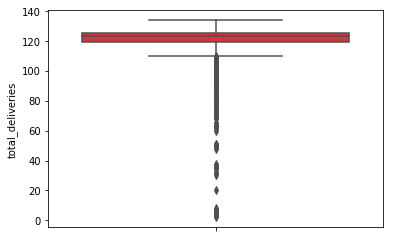

In [171]:
sns.boxplot(data=df_outcome, y='total_deliveries')

In [172]:
df_outcome.describe()

,match_id,total_runs_Q1,total_runs_Q2,total_runs_Q3,total_runs_Q4,player_dismissed_Q1,player_dismissed_Q2,player_dismissed_Q3,player_dismissed_Q4,total_runs,...,win_vs_toss,winning_inning,Q1_run_frac,Q2_run_frac,Q3_run_frac,Q4_run_frac,Q1_wicket_frac,Q2_wicket_frac,Q3_wicket_frac,Q4_wicket_frac
count,1528.000000,1528.000000,1504.000000,1486.000000,1424.000000,1528.000000,1504.000000,1486.000000,1424.000000,1528.000000,...,1510.000000,1510.000000,1528.000000,1504.000000,1486.000000,1424.000000,1505.000000,1493.000000,1478.000000,1422.000000
mean,1805.107984,37.512435,36.865691,39.735532,44.577247,1.176047,1.142952,1.359354,2.316011,153.985602,...,0.520530,0.498013,0.260174,0.240086,0.253462,0.275786,0.219651,0.208363,0.236722,0.361086
std,3481.506658,11.027612,10.415547,11.928492,16.384083,1.015803,0.999756,1.054126,1.566918,35.425449,...,0.499744,0.500162,0.122721,0.066369,0.060533,0.082242,0.212755,0.203306,0.189730,0.203750
min,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.085106,0.041667,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189.750000,30.000000,30.000000,32.000000,35.000000,0.000000,0.000000,1.000000,1.000000,136.000000,...,0.000000,0.000000,0.201183,0.195567,0.213415,0.231293,0.000000,0.000000,0.111111,0.250000
50%,380.000000,37.000000,36.000000,39.000000,45.000000,1.000000,1.000000,1.000000,2.000000,157.000000,...,1.000000,0.000000,0.240642,0.234525,0.248536,0.282062,0.200000,0.200000,0.222222,0.375000
75%,567.250000,44.250000,43.000000,46.000000,55.000000,2.000000,2.000000,2.000000,3.000000,177.250000,...,1.000000,1.000000,0.284617,0.274510,0.291116,0.331412,0.333333,0.333333,0.333333,0.500000
max,11415.000000,85.000000,83.000000,84.000000,112.000000,7.000000,6.000000,6.000000,8.000000,263.000000,...,1.000000,1.000000,1.000000,0.603604,0.562500,0.520270,1.000000,1.000000,1.000000,1.000000


If there is no value for either runs or wickets in an inning quarter, thats most probably because that session was no played. highly unlikely that a 5 over session didnt generate any wicket or any runs

In [173]:
df_outcome[df_outcome.total_runs.isna()]

,match_id,inning,total_runs_Q1,total_runs_Q2,total_runs_Q3,total_runs_Q4,player_dismissed_Q1,player_dismissed_Q2,player_dismissed_Q3,player_dismissed_Q4,...,win_vs_toss,winning_inning,Q1_run_frac,Q2_run_frac,Q3_run_frac,Q4_run_frac,Q1_wicket_frac,Q2_wicket_frac,Q3_wicket_frac,Q4_wicket_frac


In [174]:
df_outcome.groupby(['winning_inning'],as_index=False)['total_runs'].agg({'avg':'mean','median':'median'})

,winning_inning,avg,median
0,0.0,148.556728,149.5
1,1.0,162.869681,164.0


If playing first, the median winning score is 149 while that for batting second is 164

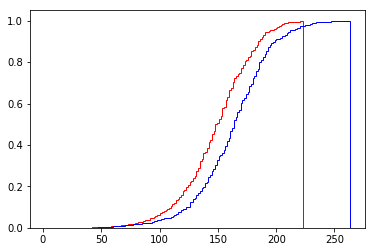

In [175]:
plt.hist(df_outcome.query('winning_inning==0')['total_runs'],density=True,color='red',bins=150,histtype='step',cumulative=True);
plt.hist(df_outcome.query('winning_inning==1')['total_runs'],density=True,color='blue',bins=150,histtype='step',cumulative=True);

In [176]:
df_outcome.columns

Index(['match_id', 'inning', 'total_runs_Q1', 'total_runs_Q2', 'total_runs_Q3',
       'total_runs_Q4', 'player_dismissed_Q1', 'player_dismissed_Q2',
       'player_dismissed_Q3', 'player_dismissed_Q4', 'total_runs',
       'total_deliveries', 'dot_composition', 'total_wickets', 'batting_team',
       'win_vs_toss', 'winning_inning', 'Q1_run_frac', 'Q2_run_frac',
       'Q3_run_frac', 'Q4_run_frac', 'Q1_wicket_frac', 'Q2_wicket_frac',
       'Q3_wicket_frac', 'Q4_wicket_frac'],
      dtype='object')

In [177]:
feature_cols = ['total_runs', 'total_deliveries', 'total_wickets','dot_composition', 'win_vs_toss',\
                'Q1_run_frac', 'Q2_run_frac','Q3_run_frac', 'Q4_run_frac',\
                'Q1_wicket_frac', 'Q2_wicket_frac','Q3_wicket_frac', 'Q4_wicket_frac']
# you want all rows, and the feature_cols' columns
X = df_outcome.loc[:, feature_cols]

y = df_outcome['winning_inning']


In [178]:
print(X.shape,y.shape)

(1528, 13) (1528,)


In [179]:
X.isna().sum()

total_runs            0
total_deliveries      0
total_wickets         0
dot_composition       0
win_vs_toss          18
Q1_run_frac           0
Q2_run_frac          24
Q3_run_frac          42
Q4_run_frac         104
Q1_wicket_frac       23
Q2_wicket_frac       35
Q3_wicket_frac       50
Q4_wicket_frac      106
dtype: int64

In [180]:
X.Q4_wicket_frac.mean()

0.3610857165182053

# Create a model to predict the winner of the game

Store the best model parameters for each classifier separately



Select the best classifier based on accuracy and run-time

In [181]:
def calc_metrics(model_object, X_test, y_test, start_timer, stop_timer):
    '''
    This function evaluates the performance of the model given the model, test values and training time
    INPUT: Model, X_test, y_test, start_time, end_time
    OUTPUT: A dictionary containing the key metrics such as accuracy, precision, recall, confusion_matrix, f1, and training time 
    '''
    X_test.fillna(X_test.mean(),inplace=True)
    y_test.fillna(y_test.mean(),inplace=True)
    y_pred = model_object.predict(X_test)
    
  
    report_accuracy = model_object.best_score_
    report_test_accuracy = accuracy_score(y_test, y_pred)
    report_conf_matrix = confusion_matrix(y_test, y_pred)
    report_precision_rate = precision_score(y_test, y_pred)
    report_recall_rate = recall_score(y_test, y_pred)
    report_f1 = f1_score(y_test, y_pred)
  
    performance_metrics = {'training_accuracy':report_accuracy,\
                           'training_time': stop_timer - start_timer,\
                           'test_accuracy': report_test_accuracy,\
                           'confusion_matrix': report_conf_matrix,\
                           'precision': report_precision_rate,\
                           'recall': report_recall_rate,\
                           'f1': report_f1\
                         
                          }
    return performance_metrics

In [187]:
# split the data set between training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# Reduce the number of principal compoenents to 2
pca_components = 2
start = timeit.default_timer()


# Construct pipelines for each including an Imputer, Scaler, PCA and classifier
pipe_logreg = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                    ('scl', StandardScaler()),\
                    ('pca', PCA(n_components=pca_components)),
                    ('clf', LogisticRegression(random_state=42,solver='lbfgs'))\
                   ])


pipe_decisiontree = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', DecisionTreeClassifier(random_state=42))\
                   ])

pipe_adaboost = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', AdaBoostClassifier(random_state=42))\
                   ])

pipe_randomforest = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', RandomForestClassifier(random_state=42))\
                   ])


pipe_mlp = Pipeline([('imp', SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)),\
                     ('scl', StandardScaler()),\
                     ('pca', PCA(n_components=pca_components)),\
                     ('clf', MLPClassifier(random_state=42, activation='relu', solver='adam', max_iter=300))\
                   ])


# List of pipelines for ease of iteration
pipelines = [pipe_logreg, pipe_decisiontree, pipe_adaboost, pipe_randomforest, pipe_mlp]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 3: 'AdaBoost', 4: 'RandomForest', 5: 'MultiLayerPerceptron'}

# Set grid search params
grid_params = [{'clf__C': np.logspace(-5, 8, 20)},\
               
               {'clf__criterion': ['gini', 'entropy'],\
                'clf__min_samples_leaf': [1, 2, 3, 4, 5],\
                'clf__max_depth': [1, 2, 3, 4, 5],\
                'clf__min_samples_split': [1, 2, 3, 4, 5][1:],\
                'clf__presort': [True, False]},\
               
               {'clf__n_estimators': [10,20,30,40,50,60,70,80,90,100,150],\
                'clf__learning_rate': np.logspace(-5,0,15)},\
               
               {'clf__n_estimators': [10,20,30,40,50,60,70,80,90,100,150],\
                'clf__max_depth': [1,2,3,4,5,6,7,8,9,10]},\
               
               {'clf__hidden_layer_sizes': [(500, 10),(500, ),(400, 10),(400, ),(300, 10),(300, ),(200, 10),(200, ),(100, 10),(100, )],\
                'clf__learning_rate':['constant', 'invscaling', 'adaptive']}\
                            
             ]


classifier_scores=[]

best_models=[]
# Fit the pipelines
for pipe, param in zip(pipelines, grid_params):
    # Start Timer for model fit
    model_start_time = timeit.default_timer()
    # Construct grid search
    gs = GridSearchCV(estimator=pipe,\
                      param_grid=param,\
                      scoring='accuracy',\
                      cv=5)
    # Fit using grid search
    gs.fit(X_train, y_train)
    #Best accuracy
    print('Best accuracy: %.3f' % gs.best_score_)
    #Best params
    print('\nBest params:\n', gs.best_params_)
    model_stop_time = timeit.default_timer()

  
    classifier_scores.append(calc_metrics(gs, X_test, y_test, model_start_time, model_stop_time))
    #joblib.dump(gs.best_estimator_, model_file)
    #best_models.append(model_file)
    


stop = timeit.default_timer()

print('Total Execution Time: ', stop - start)

df_model_performance = pd.DataFrame(classifier_scores, \
                                    index=['Logistic Regression',  \
                                           'Decision Tree', 'AdaBoost', 'RandomForest', \
                                            'MultiLayerPerceptron'\
                                          ]\
                                   )
df_model_performance



Best accuracy: 0.656

Best params:
 {'clf__C': 0.00545559478116852}
Best accuracy: 0.672

Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__presort': True}
Best accuracy: 0.688

Best params:
 {'clf__learning_rate': 0.4393970560760795, 'clf__n_estimators': 60}
Best accuracy: 0.689

Best params:
 {'clf__max_depth': 4, 'clf__n_estimators': 30}


D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\ne

Best accuracy: 0.696

Best params:
 {'clf__hidden_layer_sizes': (200, 10), 'clf__learning_rate': 'constant'}
Total Execution Time:  726.8557784


,confusion_matrix,f1,precision,recall,test_accuracy,training_accuracy,training_time
Logistic Regression,"[[156, 82], [74, 147]]",0.653333,0.641921,0.665158,0.660131,0.655753,2.694410
Decision Tree,"[[157, 81], [54, 167]]",0.712154,0.673387,0.755656,0.705882,0.671656,47.324610
AdaBoost,"[[160, 78], [46, 175]]",0.738397,0.691700,0.791855,0.729847,0.688494,187.937248
RandomForest,"[[160, 78], [48, 173]]",0.733051,0.689243,0.782805,0.725490,0.689429,109.273069
MultiLayerPerceptron,"[[170, 68], [70, 151]]",0.686364,0.689498,0.683258,0.699346,0.695978,379.490076


In [188]:
df_model_performance.sort_values(by='test_accuracy',ascending=False)

,confusion_matrix,f1,precision,recall,test_accuracy,training_accuracy,training_time
AdaBoost,"[[160, 78], [46, 175]]",0.738397,0.691700,0.791855,0.729847,0.688494,187.937248
RandomForest,"[[160, 78], [48, 173]]",0.733051,0.689243,0.782805,0.725490,0.689429,109.273069
Decision Tree,"[[157, 81], [54, 167]]",0.712154,0.673387,0.755656,0.705882,0.671656,47.324610
MultiLayerPerceptron,"[[170, 68], [70, 151]]",0.686364,0.689498,0.683258,0.699346,0.695978,379.490076
Logistic Regression,"[[156, 82], [74, 147]]",0.653333,0.641921,0.665158,0.660131,0.655753,2.694410
